In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import itertools


from pycaret.classification import *
#from pycaret.regression import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Importing Data

### Obtain Differentially Expressed Genes

After analyzing the data with DESeq2, a matrix of 118 differentially expressed genes was obtained. Using the names of the differentially expressed genes, the original avg_genes matrix can be filtered in order to use this matrix of only differentially expressed genes for machine learning applications using python libraries. 

In [4]:
#Load matrix containing DESeq2 Results
diffexpvalues=pd.read_csv('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/Final_Project_Neurotoxicity_Prediction/Final_Project_Files/RSEM_diff_exp_genes.csv')


In [5]:
diffexpvalues.head()

Unnamed: 0    d2b10a    d2b10b     d2b1a     d2b1b     d2b2a     d2b2b  \
0      ABCA4  0.000000  2.164502  0.000000  1.613127  0.000000  0.000000   
1        AFP  2.148023  0.000000  0.905171  0.000000  0.000000  0.000000   
2    ALDH1A2  1.074012  3.246752  1.810343  3.226255  1.049331  5.545598   
3    ALDH3A1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     ALOXE3  0.000000  0.000000  0.000000  1.613127  0.000000  2.218239   

      d2b3a     d2b3b     d2b4a     d2b4b       d2b5a       d2b5b     d2b6a  \
0  0.000000  0.000000  1.235978  0.000000    4.738068    0.000000  3.288692   
1  0.000000  2.411830  0.000000  2.219807    0.000000    2.004923  0.000000   
2  2.288454  6.029576  4.943914  4.439614  878.911600  930.284424  4.384923   
3  0.000000  0.000000  0.000000  0.000000    0.000000    0.000000  0.000000   
4  1.144227  0.000000  1.235978  0.000000   14.214204    2.004923  0.000000   

      d2b6b     d2b7a     d2b7b    d2b8a     d2b8b     d2b9a     d2b9b  \
0  0.000000  1.097070  3.038311  0.00000  2.296790  0.000000  2.353718   
1  2.007920  0.000000  2.025541  3.64527  3.445185  2.374321  0.000000   
2  4.015841  6.582421  6.076622  1.21509  4.593579  0.000000  4.707436   
3  2.007920  0.000000  0.000000  0.00000  2.296790  0.000000  0.000000   
4  1.003960  0.000000  0.000000  0.00000  0.000000  0.000000  1.176859   

     d2c10a    d2c10b    d2c11a    d2c11b    d2c12a    d2c12b    d2c13a  \
0  1.978828  0.908911  1.082392  0.000000  1.909078  0.000000  0.000000   
1  2.968243  0.908911  3.247175  0.978227  1.909078  3.047652  0.000000   
2  5.936485  2.726732  4.329567  1.956455  5.727235  2.031768  4.122892   
3  1.978828  0.908911  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  1.817822  2.164783  0.000000  0.000000  0.000000  0.000000   

     d2c13b    d2c14a    d2c14b    d2c15a    d2c15b    d2c16a    d2c16b  \
0  1.051018  0.000000  0.000000  0.974568  0.954584  0.000000  0.000000   
1  1.051018  0.000000  1.891946  0.000000  2.863753  2.091271  5.186124   
2  4.204072  2.936204  3.783892  4.872840  3.818337  4.182543  2.593062   
3  1.051018  0.000000  0.000000  0.974568  1.909168  0.000000  0.000000   
4  0.000000  0.000000  1.891946  1.949136  0.954584  0.000000  1.296531   

     d2c17a   d2c17b    d2c18a    d2c18b   d2c19a    d2c19b     d2c1a  \
0  0.000000  0.00000  0.000000  1.795516  0.96963  0.861968  0.000000   
1  0.000000  1.70432  0.836040  0.000000  0.00000  1.723937  1.982466   
2  1.906130  1.70432  0.836040  4.488789  0.96963  5.171810  1.982466   
3  0.953065  0.00000  2.508121  0.000000  0.00000  0.000000  0.000000   
4  0.000000  0.00000  1.672080  1.795516  0.00000  0.000000  0.991233   

      d2c1b    d2c20a    d2c20b    d2c21a    d2c21b    d2c22a    d2c22b  \
0  0.000000  0.000000  1.098062  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  2.196124  2.196428  0.978777  2.170576  2.034285   
2  1.074153  2.369189  4.392249  2.196428  1.957555  7.597016  5.085712   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.017142   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     d2c23a    d2c23b    d2c24a    d2c24b    d2c25a    d2c25b   d2c26a  \
0  0.000000  1.017094  0.000000  0.000000  0.000000  0.000000  0.94773   
1  0.000000  1.017094  0.000000  3.130818  1.998448  1.020528  1.89546   
2  1.032822  4.068376  4.128737  2.087212  1.998448  5.102639  6.63411   
3  0.000000  0.000000  2.064369  2.087212  0.000000  0.000000  0.00000   
4  0.000000  0.000000  1.032184  2.087212  0.000000  0.000000  0.00000   

     d2c26b     d2c2a     d2c2b     d2c3a     d2c3b     d2c4a     d2c4b  \
0  0.000000  1.876728  0.827751  2.800746  1.855486  1.012857  0.926425   
1  1.882756  0.000000  0.000000  1.867164  0.000000  4.051426  1.852850   
2  2.824133  1.876728  1.655503  3.734328  1.855486  5.064283  4.632124   
3  0.000000  0.000000  0.000000  0.000000  0.000000  1.012857  0.000000   
4  1.882756  

In [6]:
GeneID=diffexpvalues['Unnamed: 0'] #Set row names to Gene IDs
diffexpvalues=diffexpvalues.drop(['Unnamed: 0'], axis=1) 
diffexpvalues=diffexpvalues.set_index(GeneID)
diffexpvalues = diffexpvalues.rename_axis(None) #Delete label from very first column
diffexpvalues

d2b10a     d2b10b      d2b1a      d2b1b      d2b2a      d2b2b  \
ABCA4        0.000000   2.164502   0.000000   1.613127   0.000000   0.000000   
AFP          2.148023   0.000000   0.905171   0.000000   0.000000   0.000000   
ALDH1A2      1.074012   3.246752   1.810343   3.226255   1.049331   5.545598   
ALDH3A1      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ALOXE3       0.000000   0.000000   0.000000   1.613127   0.000000   2.218239   
APOBEC3B     0.000000   0.000000   0.000000   1.613127   1.049331   0.000000   
APOL3        0.000000   1.082251   0.000000   0.000000   4.197324   2.218239   
ARHGEF15     0.000000   1.082251   0.000000   0.806564   0.000000   0.000000   
ARSI         2.148023   2.164502   3.620686   4.839382   2.098662   2.218239   
ASB2         0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BATF2        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BTLA         1.074012   0.000000   0.000000   0.000000   1.049331   2.218239   
BTN1A1       0.000000   0.000000   0.905171   0.000000   0.000000   0.000000   
C10orf90     0.000000   1.082251   0.000000   0.000000   0.000000   1.109120   
C11orf91     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
C19orf38     0.000000   0.000000   0.000000   0.000000   2.098662   0.000000   
C3orf45      1.074012   0.000000   0.000000   0.000000   0.000000   0.000000   
C9           0.000000   0.000000   1.810343   1.613127   0.000000   0.000000   
C9orf135     1.074012   0.000000   0.000000   0.000000   0.000000   2.218239   
CASQ2        0.000000   0.000000   0.905171   0.000000   1.049331   0.000000   
CCIN         0.000000   1.082251   0.000000   0.000000   0.000000   0.000000   
CCR7         2.148023   2.164502   0.000000   0.000000   0.000000   1.109120   
CD300LB      0.000000   2.164502   0.000000   0.000000   0.000000   0.000000   
CHI3L2       1.074012   0.000000   1.810343   0.000000   0.000000   0.000000   
CKM          0.000000   0.000000   0.000000   1.613127   2.098662   0.000000   
CLCA2        0.000000   0.000000   0.000000   0.806564   0.000000   0.000000   
CLDN11      13.962151  14.069260   4.525857   6.452509   0.000000   4.436479   
CLEC17A      0.000000   0.000000   2.715514   0.000000   0.000000   0.000000   
CLPS         0.000000   1.082251   0.000000   0.000000   0.000000   0.000000   
CRB3         0.000000   2.164502   0.000000   0.806564   0.000000   1.109120   
CRYAA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CRYBA4       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CRYBB1       2.148023   0.000000   0.000000   0.000000   0.000000   1.109120   
CXCL10       0.000000   0.000000   0.000000   0.000000   2.098662   2.218239   
DDO          2.148023   0.000000   1.810343   0.000000   0.000000   0.000000   
DGKG         6.444070   0.000000   0.905171   0.000000   1.049331   2.218239   
DLX2         0.000000   0.000000   1.810343   0.000000   1.049331   0.000000   
DNAH17       4.296046   4.329003   3.620686   4.032818   3.147993   2.218239   
DNAH3        1.074012   0.000000   0.000000   0.806564   1.049331   0.000000   
EBI3         0.000000   1.082251   0.905171   2.419691   1.049331   0.000000   
ELF3         0.000000   0.000000   0.000000   1.613127   2.098662   2.218239   
FABP4        0.000000   0.000000   0.000000   1.613127   0.000000   2.218239   
FAIM3        3.222035   0.000000   0.000000   0.000000   0.000000   0.000000   
FAM124B      0.000000   0.000000   0.000000   0.806564   0.000000   2.218239   
FAM209B      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
FAM71F1      2.148023   1.082251   0.000000   0.000000   1.049331   2.218239   
FAM83G       6.444070   9.740257   1.810343   1.613127  10.493310  13.309436   
FITM1        0.000000   0.000000   0.000000   0.000000   0.000000   1.109120   
FOSB         0.000000   0.000000   0.000000   0.806564   2.098662   0.000000   
FOSL1       18.

## Exploratory Data Analysis (EDA) of differentially expressed genes

In [7]:
corr_genes=diffexpvalues.corr()
corr_genes

d2b10a    d2b10b     d2b1a     d2b1b     d2b2a     d2b2b     d2b3a  \
d2b10a  1.000000  0.949032  0.882924  0.893914  0.362969  0.430702  0.919166   
d2b10b  0.949032  1.000000  0.878922  0.909876  0.367800  0.454604  0.950715   
d2b1a   0.882924  0.878922  1.000000  0.960177  0.386990  0.447499  0.892735   
d2b1b   0.893914  0.909876  0.960177  1.000000  0.334826  0.398100  0.930332   
d2b2a   0.362969  0.367800  0.386990  0.334826  1.000000  0.763344  0.388058   
d2b2b   0.430702  0.454604  0.447499  0.398100  0.763344  1.000000  0.438761   
d2b3a   0.919166  0.950715  0.892735  0.930332  0.388058  0.438761  1.000000   
d2b3b   0.926418  0.952640  0.833235  0.878492  0.324952  0.388837  0.945022   
d2b4a   0.890255  0.925134  0.790123  0.850001  0.302773  0.389171  0.919224   
d2b4b   0.918664  0.923687  0.877179  0.901929  0.323240  0.387683  0.940941   
d2b5a   0.398839  0.478456  0.179597  0.310892  0.053623  0.045976  0.494748   
d2b5b   0.399963  0.479289  0.179857  0.310036  0.052343  0.046630  0.494117   
d2b6a   0.934756  0.961962  0.906559  0.948290  0.370755  0.458437  0.959646   
d2b6b   0.932352  0.948493  0.868832  0.893241  0.347693  0.465414  0.918498   
d2b7a   0.888170  0.919543  0.777000  0.833701  0.389892  0.398063  0.922888   
d2b7b   0.909080  0.924075  0.911893  0.929481  0.439115  0.514906  0.940746   
d2b8a   0.950678  0.959522  0.920812  0.945261  0.361262  0.436002  0.949425   
d2b8b   0.893211  0.929164  0.831610  0.883348  0.361589  0.458394  0.941822   
d2b9a   0.914241  0.917834  0.918330  0.927773  0.331730  0.388399  0.932990   
d2b9b   0.936333  0.951465  0.882009  0.915072  0.309970  0.392667  0.925821   
d2c10a  0.874842  0.871589  0.766710  0.834523  0.282686  0.348513  0.869123   
d2c10b  0.914509  0.924290  0.925006  0.955826  0.351259  0.411106  0.943775   
d2c11a  0.916454  0.913795  0.920774  0.933382  0.385486  0.455512  0.925119   
d2c11b  0.931529  0.924079  0.923209  0.921268  0.304317  0.376335  0.899273   
d2c12a  0.954795  0.960233  0.923478  0.924873  0.389737  0.487238  0.933538   
d2c12b  0.897174  0.903092  0.806671  0.850659  0.329680  0.378871  0.911802   
d2c13a  0.841052  0.864817  0.761452  0.819921  0.362354  0.431790  0.898944   
d2c13b  0.880052  0.914273  0.751679  0.822216  0.320288  0.347454  0.911158   
d2c14a  0.903082  0.941698  0.855956  0.899744  0.372366  0.394100  0.938896   
d2c14b  0.938535  0.958634  0.881390  0.916851  0.357348  0.429876  0.960567   
d2c15a  0.895384  0.901884  0.857306  0.902792  0.328123  0.358720  0.933760   
d2c15b  0.907661  0.894243  0.949941  0.959430  0.342231  0.384859  0.915922   
d2c16a  0.869399  0.906902  0.776829  0.827724  0.326672  0.360518  0.921460   
d2c16b  0.886502  0.910047  0.800065  0.859001  0.375918  0.354994  0.920058   
d2c17a  0.837884  0.876705  0.791993  0.846170  0.414950  0.487337  0.898750   
d2c17b  0.839067  0.872533  0.742729  0.790553  0.347853  0.433189  0.884352   
d2c18a  0.941670  0.951704  0.901504  0.931415  0.409059  0.478014  0.957710   
d2c18b  0.931128  0.953926  0.861834  0.902752  0.328153  0.431894  0.940316   
d2c19a  0.912623  0.920203  0.858574  0.882516  0.332024  0.382718  0.940040   
d2c19b  0.937964  0.956786  0.854602  0.901367  0.345885  0.413147  0.944589   
d2c1a   0.853336  0.878942  0.763359  0.801282  0.404659  0.431181  0.891496   
d2c1b   0.920986  0.936587  0.898620  0.921212  0.366760  0.466691  0.929768   
d2c20a  0.820727  0.873581  0.690508  0.768977  0.309236  0.398489  0.870524   
d2c20b  0.931072  0.945533  0.848669  0.879035  0.390767  0.447632  0.933985   
d2c21a  0.888201  0.925729  0.793724  0.847617  0.353590  0.404548  0.933603   
d2c21b  0.890508  0.870340  0.956615  0.946756  0.330154  0.377146  0.888985   
d2c22a  0.856870  0.889860  0.786781  0.845353  0.343194  0.409304  0.924103   
d2c22b  0.909238  0.920789  0.904610  0.936153  0.367987  0.394293  0.957734   
d2c23a  0.757475  0.801172  0.564405  0.661740  0.232498  0.265383  0.798603   
d2c23b  0.

In [8]:
#Get the names of the genes
index = diffexpvalues.index
a_list = list(index)
print(len(a_list))

118


In [9]:
#Get the names of the samples
b_list=[]
for col in corr_genes.columns:
    b_list.append(col)

In [18]:
print(len(b_list))

140


Text(0.5, 0.98, 'Clustered Heatmap showing correlations wihin top 118 differentially expressed genes')

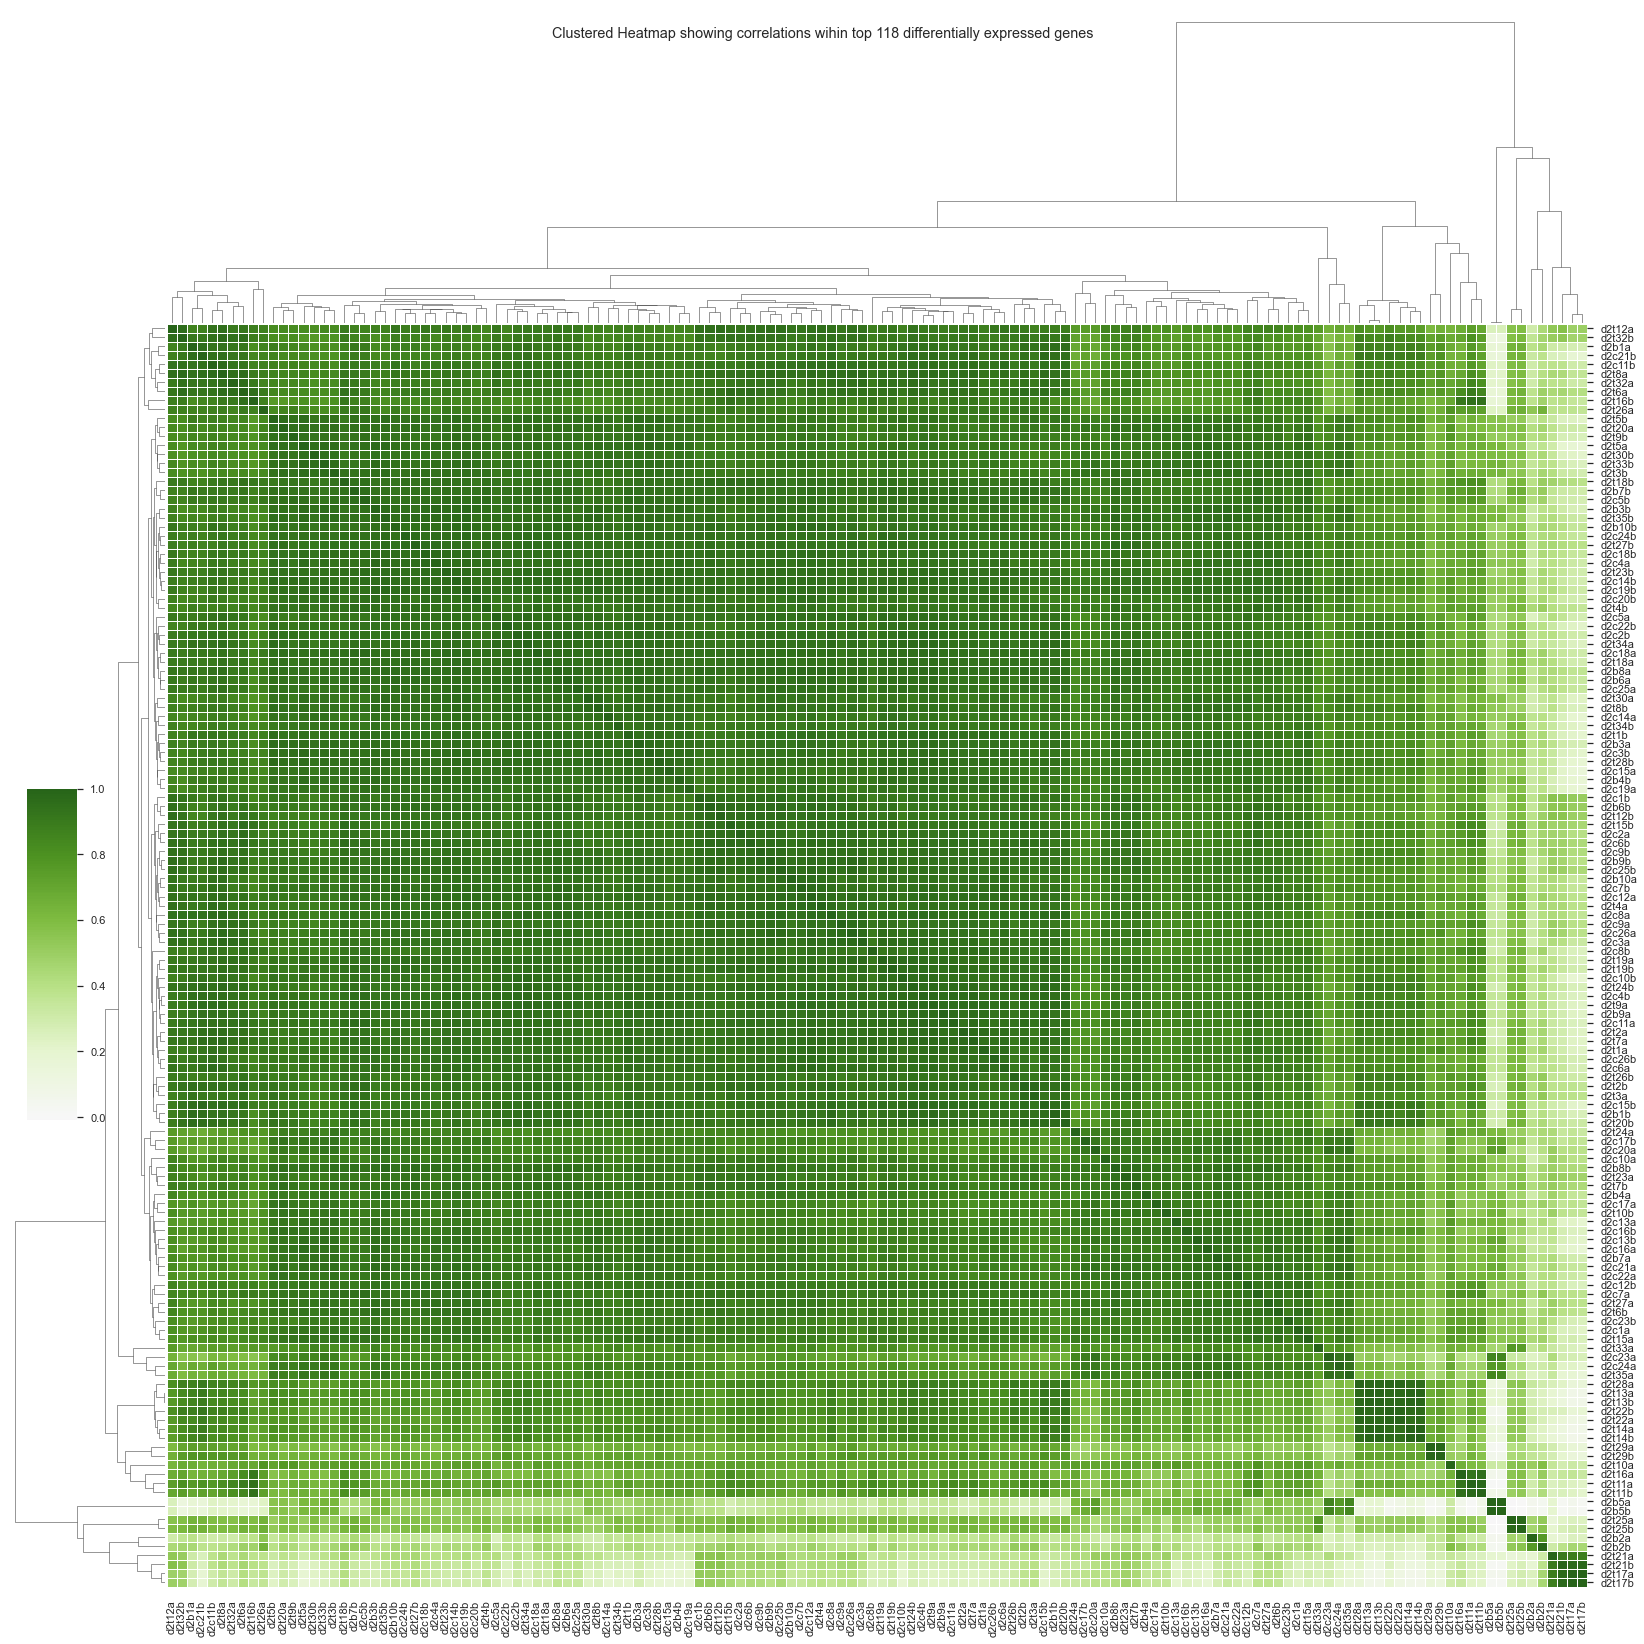

In [19]:
sns.set(font_scale=1)
sns.clustermap(corr_genes, center=0, cmap="PiYG",yticklabels=True,xticklabels=True,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(23, 23)).fig.suptitle("Clustered Heatmap showing correlations wihin top 118 differentially expressed genes")

### Split the data into toxic and non toxic groups

In [20]:
Toxic=diffexpvalues.iloc[:, 0:72]

In [21]:
Toxic

d2b10a     d2b10b      d2b1a      d2b1b      d2b2a      d2b2b  \
ABCA4        0.000000   2.164502   0.000000   1.613127   0.000000   0.000000   
AFP          2.148023   0.000000   0.905171   0.000000   0.000000   0.000000   
ALDH1A2      1.074012   3.246752   1.810343   3.226255   1.049331   5.545598   
ALDH3A1      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ALOXE3       0.000000   0.000000   0.000000   1.613127   0.000000   2.218239   
APOBEC3B     0.000000   0.000000   0.000000   1.613127   1.049331   0.000000   
APOL3        0.000000   1.082251   0.000000   0.000000   4.197324   2.218239   
ARHGEF15     0.000000   1.082251   0.000000   0.806564   0.000000   0.000000   
ARSI         2.148023   2.164502   3.620686   4.839382   2.098662   2.218239   
ASB2         0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BATF2        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BTLA         1.074012   0.000000   0.000000   0.000000   1.049331   2.218239   
BTN1A1       0.000000   0.000000   0.905171   0.000000   0.000000   0.000000   
C10orf90     0.000000   1.082251   0.000000   0.000000   0.000000   1.109120   
C11orf91     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
C19orf38     0.000000   0.000000   0.000000   0.000000   2.098662   0.000000   
C3orf45      1.074012   0.000000   0.000000   0.000000   0.000000   0.000000   
C9           0.000000   0.000000   1.810343   1.613127   0.000000   0.000000   
C9orf135     1.074012   0.000000   0.000000   0.000000   0.000000   2.218239   
CASQ2        0.000000   0.000000   0.905171   0.000000   1.049331   0.000000   
CCIN         0.000000   1.082251   0.000000   0.000000   0.000000   0.000000   
CCR7         2.148023   2.164502   0.000000   0.000000   0.000000   1.109120   
CD300LB      0.000000   2.164502   0.000000   0.000000   0.000000   0.000000   
CHI3L2       1.074012   0.000000   1.810343   0.000000   0.000000   0.000000   
CKM          0.000000   0.000000   0.000000   1.613127   2.098662   0.000000   
CLCA2        0.000000   0.000000   0.000000   0.806564   0.000000   0.000000   
CLDN11      13.962151  14.069260   4.525857   6.452509   0.000000   4.436479   
CLEC17A      0.000000   0.000000   2.715514   0.000000   0.000000   0.000000   
CLPS         0.000000   1.082251   0.000000   0.000000   0.000000   0.000000   
CRB3         0.000000   2.164502   0.000000   0.806564   0.000000   1.109120   
CRYAA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CRYBA4       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CRYBB1       2.148023   0.000000   0.000000   0.000000   0.000000   1.109120   
CXCL10       0.000000   0.000000   0.000000   0.000000   2.098662   2.218239   
DDO          2.148023   0.000000   1.810343   0.000000   0.000000   0.000000   
DGKG         6.444070   0.000000   0.905171   0.000000   1.049331   2.218239   
DLX2         0.000000   0.000000   1.810343   0.000000   1.049331   0.000000   
DNAH17       4.296046   4.329003   3.620686   4.032818   3.147993   2.218239   
DNAH3        1.074012   0.000000   0.000000   0.806564   1.049331   0.000000   
EBI3         0.000000   1.082251   0.905171   2.419691   1.049331   0.000000   
ELF3         0.000000   0.000000   0.000000   1.613127   2.098662   2.218239   
FABP4        0.000000   0.000000   0.000000   1.613127   0.000000   2.218239   
FAIM3        3.222035   0.000000   0.000000   0.000000   0.000000   0.000000   
FAM124B      0.000000   0.000000   0.000000   0.806564   0.000000   2.218239   
FAM209B      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
FAM71F1      2.148023   1.082251   0.000000   0.000000   1.049331   2.218239   
FAM83G       6.444070   9.740257   1.810343   1.613127  10.493310  13.309436   
FITM1        0.000000   0.000000   0.000000   0.000000   0.000000   1.109120   
FOSB         0.000000   0.000000   0.000000   0.806564   2.098662   0.000000   
FOSL1       18.

In [22]:
Nontoxic=diffexpvalues.iloc[:, 72:]

In [23]:
Nontoxic

d2t10a     d2t10b      d2t11a      d2t11b     d2t12a  \
ABCA4        0.000000   0.000000    1.870371    1.538279   0.000000   
AFP          0.000000   0.000000    5.611114    3.845698   2.073123   
ALDH1A2      1.784878   0.785764    3.740743    4.614838   4.146247   
ALDH3A1      1.784878   0.000000    0.000000    1.538279   0.000000   
ALOXE3       0.892439   1.571529    0.000000    0.000000   2.073123   
APOBEC3B     0.000000   0.000000   13.092600   12.306234   0.000000   
APOL3        1.784878   0.000000    9.351857    4.614838   4.146247   
ARHGEF15     3.569757   0.000000    3.740743    0.000000   0.000000   
ARSI         5.354635   0.000000   10.287043    7.691396   4.146247   
ASB2         0.892439   1.571529    0.000000    1.538279   0.000000   
BATF2        0.000000   0.000000    0.000000    1.538279   0.000000   
BTLA         0.000000   1.571529    0.000000    0.769140   1.036562   
BTN1A1       0.000000   0.000000    0.000000    0.000000   0.000000   
C10orf90     0.000000   0.785764    1.870371    0.769140   2.073123   
C11orf91     0.000000   1.571529    0.000000    2.307419   2.073123   
C19orf38     0.000000   0.785764    0.000000    1.538279   2.073123   
C3orf45      0.000000   0.000000    0.000000    1.538279   0.000000   
C9           0.000000   0.000000    0.000000    0.000000   0.000000   
C9orf135     0.000000   1.571529    2.805557    0.769140   2.073123   
CASQ2        0.000000   0.000000    1.870371    0.769140   2.073123   
CCIN         1.784878   0.000000    0.000000    0.769140   0.000000   
CCR7         0.892439   0.785764    0.000000    0.000000   1.036562   
CD300LB      0.000000   0.785764    0.000000    0.000000   0.000000   
CHI3L2       0.000000   0.000000    4.675929    1.538279   0.000000   
CKM          0.000000   1.571529    0.000000    0.000000   0.000000   
CLCA2        1.784878   0.000000   24.314828   14.613653   0.000000   
CLDN11       0.892439   6.286115   30.861128   23.843328  37.316222   
CLEC17A      1.784878   0.785764    1.870371    0.769140   0.000000   
CLPS         0.000000   1.571529    0.000000    0.769140   2.073123   
CRB3         1.784878   1.571529    0.000000    1.538279   0.000000   
CRYAA        0.000000   0.000000    1.870371    3.076559   0.000000   
CRYBA4       0.000000   0.000000    1.870371    3.076559   0.000000   
CRYBB1       1.784878   0.785764    4.675929    0.769140   0.000000   
CXCL10       0.000000   0.000000    7.481486    4.614838   0.000000   
DDO          0.000000   1.571529    0.935186    0.000000   2.073123   
DGKG         1.784878   1.571529    1.870371    3.076559   2.073123   
DLX2         0.000000   0.000000    0.000000    0.000000   1.036562   
DNAH17       1.784878   0.000000    1.870371    5.383977   5.182809   
DNAH3        0.892439   1.571529    4.675929    4.614838   0.000000   
EBI3         0.000000   0.000000    9.351857    3.076559   1.036562   
ELF3         1.784878   0.000000    1.870371    0.000000   0.000000   
FABP4        0.000000   0.000000    2.805557    0.000000   0.000000   
FAIM3        1.784878   0.000000    1.870371    1.538279   2.073123   
FAM124B      1.784878   0.000000    3.740743    0.769140   3.109685   
FAM209B      0.000000   0.000000    0.000000    0.000000   0.000000   
FAM71F1      1.784878   1.571529    0.000000    1.538279   3.109685   
FAM83G       6.247074   5.500351    4.675929   16.151932   7.255932   
FITM1        0.000000   0.000000    0.000000    0.000000   0.000000   
FOSB         0.892439   0.000000    4.675929    1.538279   2.073123   
FOSL1        3.569757   3.928822   76.685228   59.992891  26.950605   
FOXD4L1      4.462196   0.000000    0.000000    0.000000   0.000000   
FOXD4L6      0.000000   2.357293    0.000000    1.538279   4.146247   
FSD2         0.000000   1.571529    0.000000    1.538279   0.000000   
GALR2        0.000000   0.000000    0.000000    0.000000   2.073123   
GDF15        5.354635   3.143058  180.490842  138.445133  10.365617   
GLDN         0.000000   0.785764    0.0

### Visualize Gene Count Distributions

In [24]:
melted_diffexpvalues=pd.melt(diffexpvalues)
melted_Nontoxic=pd.melt(Nontoxic)
melted_Toxic=pd.melt(Toxic)

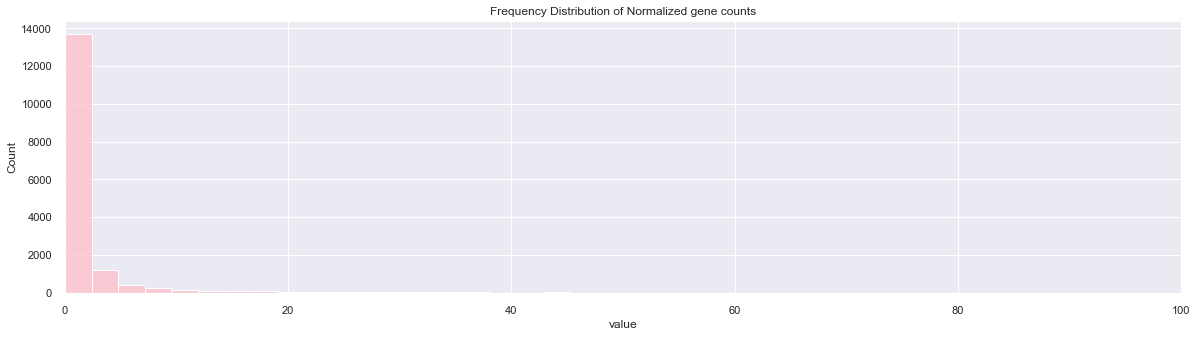

In [25]:
plt.figure(figsize=(20,5))
plt.xlim(0,100)
count_histogram=sns.histplot(data=melted_diffexpvalues, x="value",bins=10000,color='pink').set(title='Frequency Distribution of Normalized gene counts')

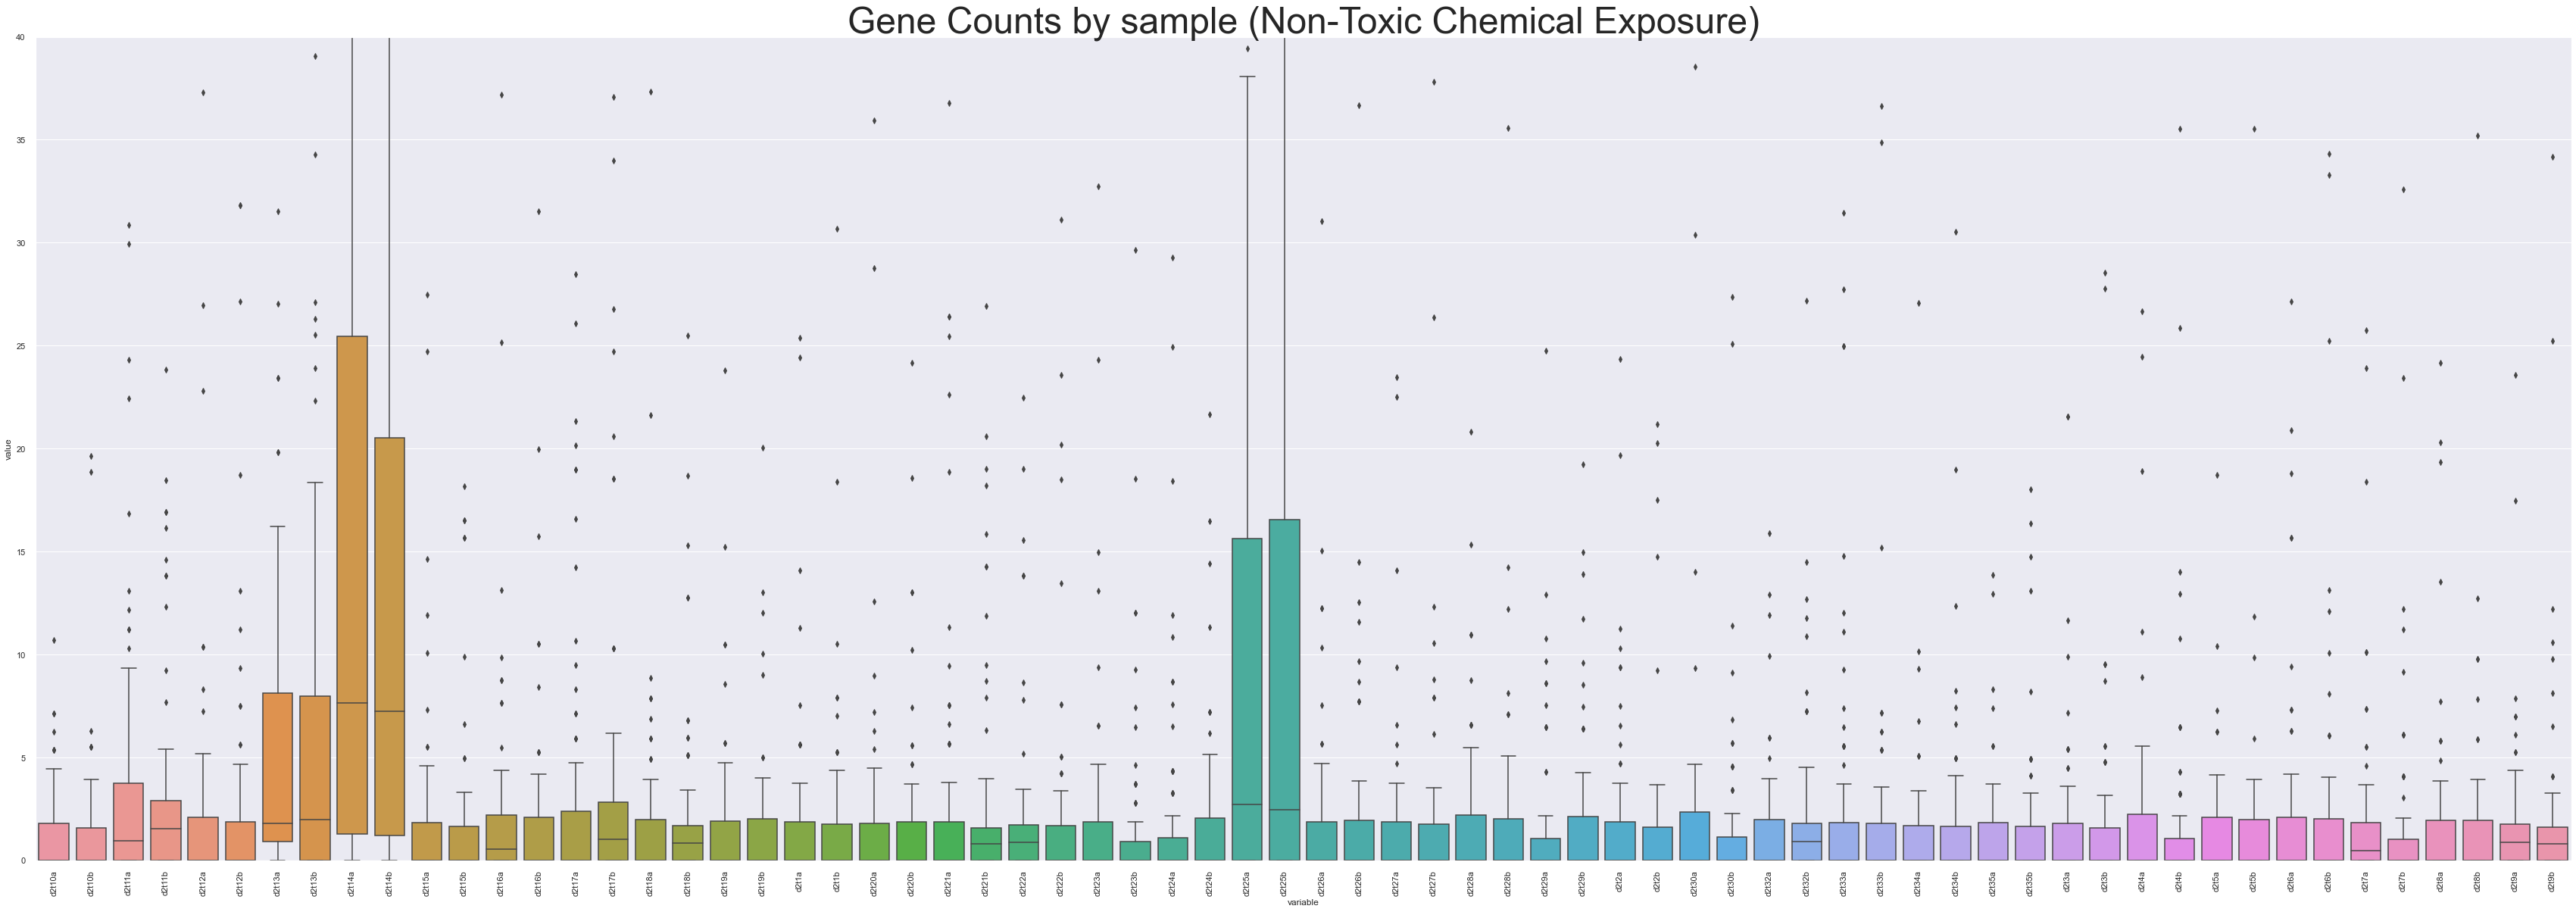

In [26]:
plt.figure(figsize=(60,20))
plt.ylim(0,40)
plt.xticks(rotation=90)
sns.set(font_scale=4)
boxplot_nontoxic=sns.boxplot(
    data=melted_Nontoxic,
    x='variable',
    y='value').set(title='Gene Counts by sample (Non-Toxic Chemical Exposure)')

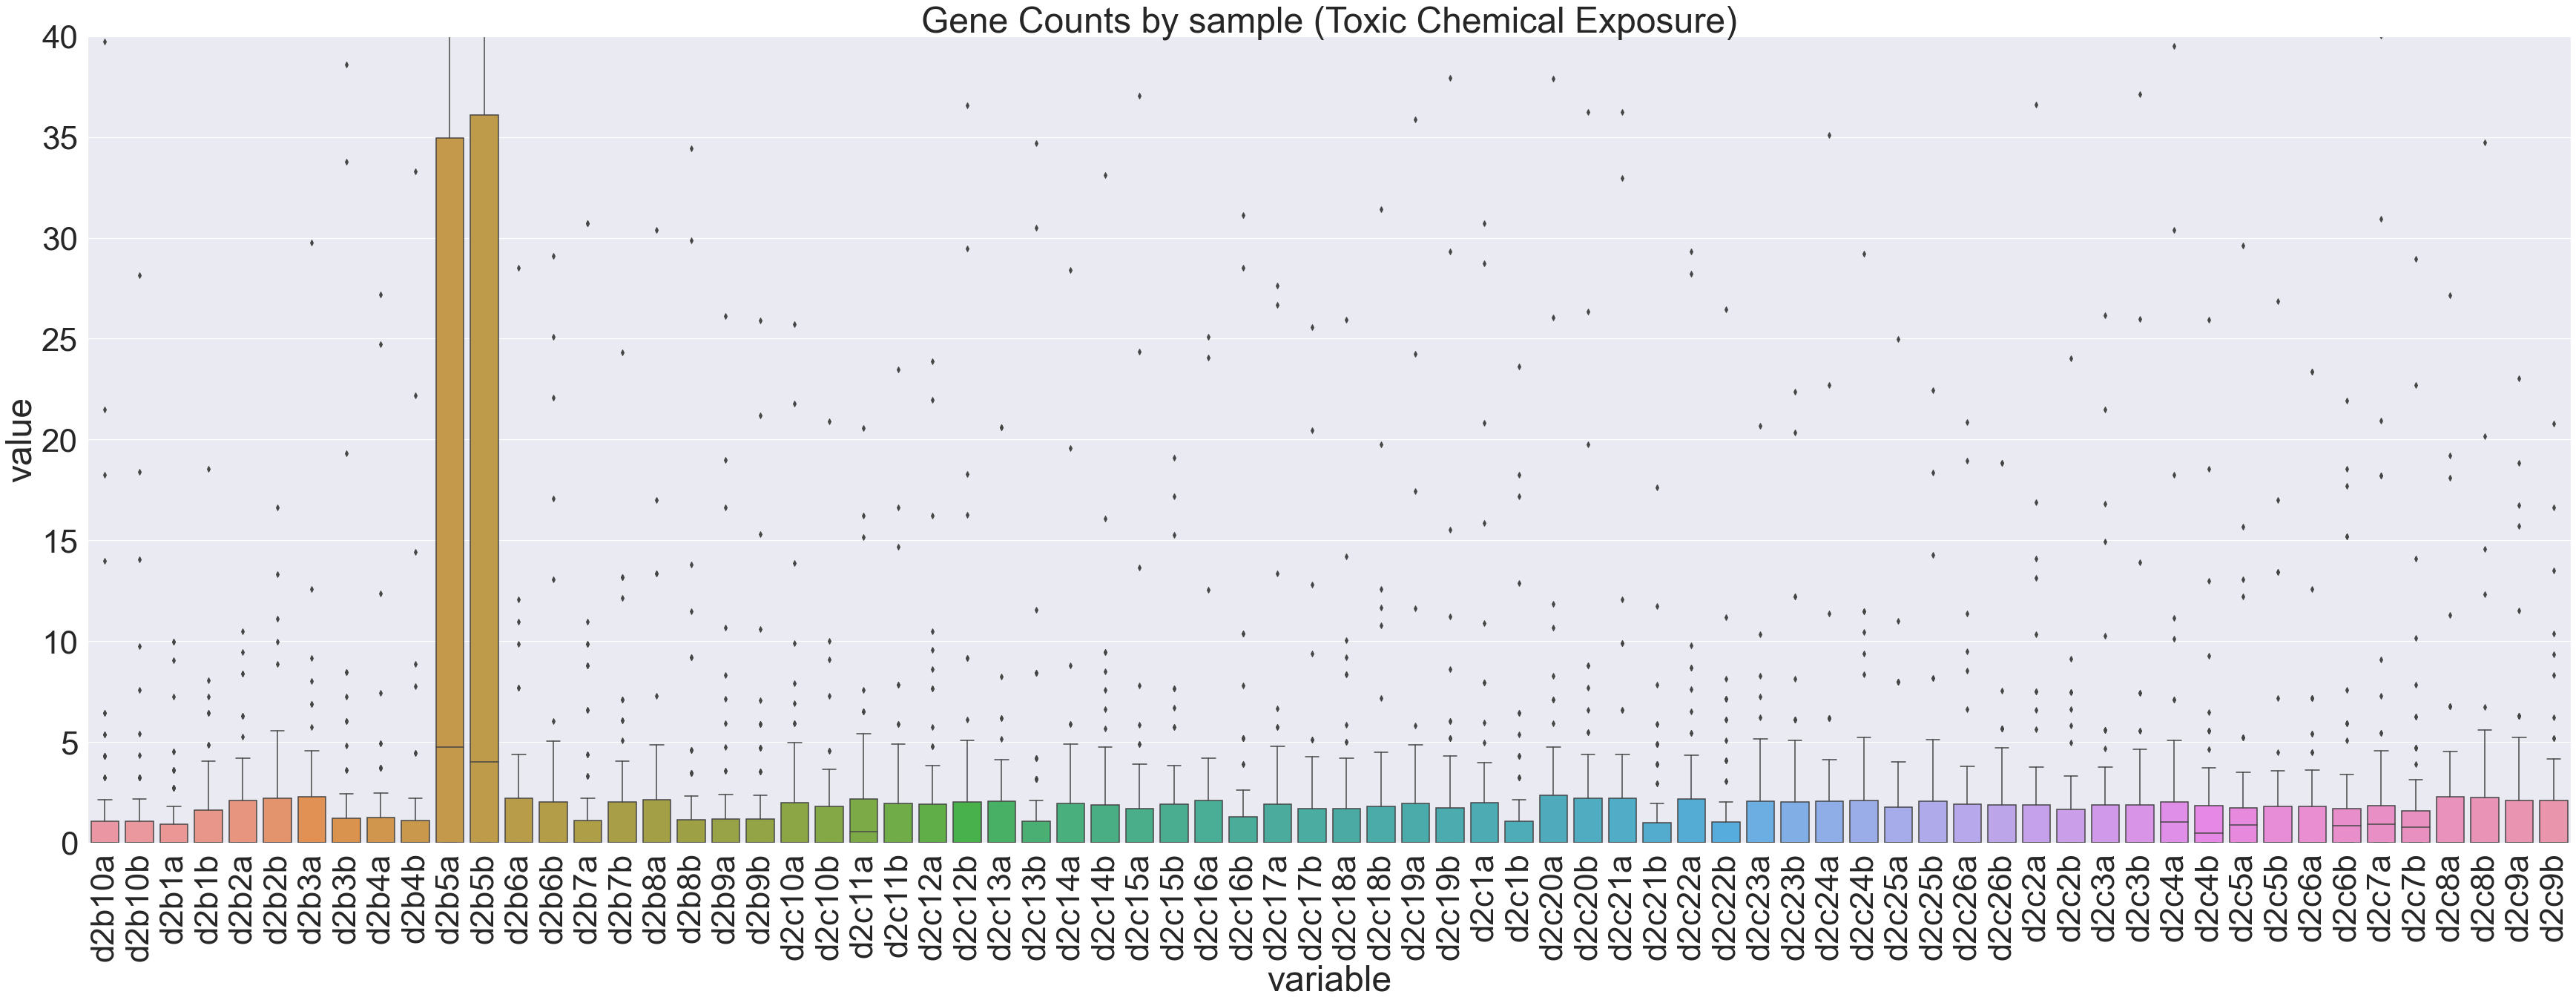

In [27]:
plt.figure(figsize=(60,20))
plt.ylim(0,40)
plt.xticks(rotation=90)
sns.set(font_scale=4)
boxplot_nontoxic=sns.boxplot(
    data=melted_Toxic,
    x='variable',
    y='value').set(title='Gene Counts by sample (Toxic Chemical Exposure)')

Transpose dataframes in order to make gene IDs the columns/feature names

In [28]:
Toxic_T=Toxic.transpose()
Nontoxic_T=Nontoxic.transpose()
#Toxic samples will be given a value of 1, Nontoxic samples will be given a value of 0 
Toxic_T['Target']=(list(itertools.repeat(1, len(Toxic_T))))
Nontoxic_T['Target']=(list(itertools.repeat(0, len(Nontoxic_T))))

In [29]:
Toxic_T.head()

ABCA4       AFP   ALDH1A2  ALDH3A1    ALOXE3  APOBEC3B     APOL3  \
d2b10a  0.000000  2.148023  1.074012      0.0  0.000000  0.000000  0.000000   
d2b10b  2.164502  0.000000  3.246752      0.0  0.000000  0.000000  1.082251   
d2b1a   0.000000  0.905171  1.810343      0.0  0.000000  0.000000  0.000000   
d2b1b   1.613127  0.000000  3.226255      0.0  1.613127  1.613127  0.000000   
d2b2a   0.000000  0.000000  1.049331      0.0  0.000000  1.049331  4.197324   

        ARHGEF15      ARSI  ASB2  BATF2      BTLA    BTN1A1  C10orf90  \
d2b10a  0.000000  2.148023   0.0    0.0  1.074012  0.000000  0.000000   
d2b10b  1.082251  2.164502   0.0    0.0  0.000000  0.000000  1.082251   
d2b1a   0.000000  3.620686   0.0    0.0  0.000000  0.905171  0.000000   
d2b1b   0.806564  4.839382   0.0    0.0  0.000000  0.000000  0.000000   
d2b2a   0.000000  2.098662   0.0    0.0  1.049331  0.000000  0.000000   

        C11orf91  C19orf38   C3orf45        C9  C9orf135     CASQ2      CCIN  \
d2b10a       0.0  0.000000  1.074012  0.000000  1.074012  0.000000  0.000000   
d2b10b       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  1.082251   
d2b1a        0.0  0.000000  0.000000  1.810343  0.000000  0.905171  0.000000   
d2b1b        0.0  0.000000  0.000000  1.613127  0.000000  0.000000  0.000000   
d2b2a        0.0  2.098662  0.000000  0.000000  0.000000  1.049331  0.000000   

            CCR7   CD300LB    CHI3L2       CKM     CLCA2     CLDN11   CLEC17A  \
d2b10a  2.148023  0.000000  1.074012  0.000000  0.000000  13.962151  0.000000   
d2b10b  2.164502  2.164502  0.000000  0.000000  0.000000  14.069260  0.000000   
d2b1a   0.000000  0.000000  1.810343  0.000000  0.000000   4.525857  2.715514   
d2b1b   0.000000  0.000000  0.000000  1.613127  0.806564   6.452509  0.000000   
d2b2a   0.000000  0.000000  0.000000  2.098662  0.000000   0.000000  0.000000   

            CLPS      CRB3  CRYAA  CRYBA4    CRYBB1    CXCL10       DDO  \
d2b10a  0.000000  0.000000    0.0     0.0  2.148023  0.000000  2.148023   
d2b10b  1.082251  2.164502    0.0     0.0  0.000000  0.000000  0.000000   
d2b1a   0.000000  0.000000    0.0     0.0  0.000000  0.000000  1.810343   
d2b1b   0.000000  0.806564    0.0     0.0  0.000000  0.000000  0.000000   
d2b2a   0.000000  0.000000    0.0     0.0  0.000000  2.098662  0.000000   

            DGKG      DLX2    DNAH17     DNAH3      EBI3      ELF3     FABP4  \
d2b10a  6.444070  0.000000  4.296046  1.074012  0.000000  0.000000  0.000000   
d2b10b  0.000000  0.000000  4.329003  0.000000  1.082251  0.000000  0.000000   
d2b1a   0.905171  1.810343  3.620686  0.000000  0.905171  0.000000  0.000000   
d2b1b   0.000000  0.000000  4.032818  0.806564  2.419691  1.613127  1.613127   
d2b2a   1.049331  1.049331  3.147993  1.049331  1.049331  2.098662  0.000000   

           FAIM3   FAM124B  FAM209B   FAM71F1     FAM83G  FITM1      FOSB  \
d2b10a  3.222035  0.000000      0.0  2.148023   6.444070    0.0  0.000000   
d2b10b  0.000000  0.000000      0.0  1.082251   9.740257    0.0  0.000000   
d2b1a   0.000000  0.000000      0.0  0.000000   1.810343    0.0  0.000000   
d2b1b   0.000000  0.806564      0.0  0.000000   1.613127    0.0  0.806564   
d2b2a   0.000000  0.000000      0.0  1.049331  10.493310    0.0  2.098662   

            FOSL1   FOXD4L1   FOXD4L6      FSD2  GALR2     GDF15      GLDN  \
d2b10a  18.258197  3.222035  0.000000  0.000000    0.0  4.296046  0.000000   
d2b10b  18.398263  1.082251  0.000000  2.164502    0.0  3.246752  0.000000   
d2b1a    9.051715  2.715514  0.000000  0.000000    0.0  4.525857  1.810343   
d2b1b    7.259073  1.613127  2.419691  0.806564    0.0  4.839382  0.000000   
d2b2a    3.147993  0.000000  1.049331  2.098662    0.0  2.098662  0.000000   

           HABP2    HHIPL2  HIST1H1E  HIST1H3E  HOXA4     HOXC4      HSPA6  \
d2b10a  2.148023  0.000000  0.000000  1.074012    0.0  0.000000  21.480232   
d2b10b  0.000000  0.000000  0.000000  3.246752    0.0  0.000000  28.138520   
d2b1a   0.000000  0.000000  0.0

In [30]:
Nontoxic_T.head()

ABCA4       AFP   ALDH1A2   ALDH3A1    ALOXE3   APOBEC3B     APOL3  \
d2t10a  0.000000  0.000000  1.784878  1.784878  0.892439   0.000000  1.784878   
d2t10b  0.000000  0.000000  0.785764  0.000000  1.571529   0.000000  0.000000   
d2t11a  1.870371  5.611114  3.740743  0.000000  0.000000  13.092600  9.351857   
d2t11b  1.538279  3.845698  4.614838  1.538279  0.000000  12.306234  4.614838   
d2t12a  0.000000  2.073123  4.146247  0.000000  2.073123   0.000000  4.146247   

        ARHGEF15       ARSI      ASB2     BATF2      BTLA  BTN1A1  C10orf90  \
d2t10a  3.569757   5.354635  0.892439  0.000000  0.000000     0.0  0.000000   
d2t10b  0.000000   0.000000  1.571529  0.000000  1.571529     0.0  0.785764   
d2t11a  3.740743  10.287043  0.000000  0.000000  0.000000     0.0  1.870371   
d2t11b  0.000000   7.691396  1.538279  1.538279  0.769140     0.0  0.769140   
d2t12a  0.000000   4.146247  0.000000  0.000000  1.036562     0.0  2.073123   

        C11orf91  C19orf38   C3orf45   C9  C9orf135     CASQ2      CCIN  \
d2t10a  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  1.784878   
d2t10b  1.571529  0.785764  0.000000  0.0  1.571529  0.000000  0.000000   
d2t11a  0.000000  0.000000  0.000000  0.0  2.805557  1.870371  0.000000   
d2t11b  2.307419  1.538279  1.538279  0.0  0.769140  0.769140  0.769140   
d2t12a  2.073123  2.073123  0.000000  0.0  2.073123  2.073123  0.000000   

            CCR7   CD300LB    CHI3L2       CKM      CLCA2     CLDN11  \
d2t10a  0.892439  0.000000  0.000000  0.000000   1.784878   0.892439   
d2t10b  0.785764  0.785764  0.000000  1.571529   0.000000   6.286115   
d2t11a  0.000000  0.000000  4.675929  0.000000  24.314828  30.861128   
d2t11b  0.000000  0.000000  1.538279  0.000000  14.613653  23.843328   
d2t12a  1.036562  0.000000  0.000000  0.000000   0.000000  37.316222   

         CLEC17A      CLPS      CRB3     CRYAA    CRYBA4    CRYBB1    CXCL10  \
d2t10a  1.784878  0.000000  1.784878  0.000000  0.000000  1.784878  0.000000   
d2t10b  0.785764  1.571529  1.571529  0.000000  0.000000  0.785764  0.000000   
d2t11a  1.870371  0.000000  0.000000  1.870371  1.870371  4.675929  7.481486   
d2t11b  0.769140  0.769140  1.538279  3.076559  3.076559  0.769140  4.614838   
d2t12a  0.000000  2.073123  0.000000  0.000000  0.000000  0.000000  0.000000   

             DDO      DGKG      DLX2    DNAH17     DNAH3      EBI3      ELF3  \
d2t10a  0.000000  1.784878  0.000000  1.784878  0.892439  0.000000  1.784878   
d2t10b  1.571529  1.571529  0.000000  0.000000  1.571529  0.000000  0.000000   
d2t11a  0.935186  1.870371  0.000000  1.870371  4.675929  9.351857  1.870371   
d2t11b  0.000000  3.076559  0.000000  5.383977  4.614838  3.076559  0.000000   
d2t12a  2.073123  2.073123  1.036562  5.182809  0.000000  1.036562  0.000000   

           FABP4     FAIM3   FAM124B  FAM209B   FAM71F1     FAM83G  FITM1  \
d2t10a  0.000000  1.784878  1.784878      0.0  1.784878   6.247074    0.0   
d2t10b  0.000000  0.000000  0.000000      0.0  1.571529   5.500351    0.0   
d2t11a  2.805557  1.870371  3.740743      0.0  0.000000   4.675929    0.0   
d2t11b  0.000000  1.538279  0.769140      0.0  1.538279  16.151932    0.0   
d2t12a  0.000000  2.073123  3.109685      0.0  3.109685   7.255932    0.0   

            FOSB      FOSL1   FOXD4L1   FOXD4L6      FSD2     GALR2  \
d2t10a  0.892439   3.569757  4.462196  0.000000  0.000000  0.000000   
d2t10b  0.000000   3.928822  0.000000  2.357293  1.571529  0.000000   
d2t11a  4.675929  76.685228  0.000000  0.000000  0.000000  0.000000   
d2t11b  1.538279  59.992891  0.000000  1.538279  1.538279  0.000000   
d2t12a  2.073123  26.950605  0.000000  4.146247  0.000000  2.073123   

             GDF15      GLDN     HABP2    HHIPL2  HIST1H1E  HIST1H3E  \
d2t10a    5.354635  0.000000  0.000000  0.000000       0.0  0.000000   
d2t10b    3.143058  0.785764  0.000000  1.571529       0.0  1.571529   
d2t11a  180.490842  0.000000  0.935186  0.935186       0.0  0.000000   
d2t11b  138.445133  0.769

In [31]:
#Concatenate dataframes together 
Toxic_Nontoxic_Labeled=pd.concat([Toxic_T, Nontoxic_T], ignore_index=False)
Toxic_Nontoxic_Labeled

ABCA4        AFP     ALDH1A2    ALDH3A1     ALOXE3   APOBEC3B  \
d2b10a   0.000000   2.148023    1.074012   0.000000   0.000000   0.000000   
d2b10b   2.164502   0.000000    3.246752   0.000000   0.000000   0.000000   
d2b1a    0.000000   0.905171    1.810343   0.000000   0.000000   0.000000   
d2b1b    1.613127   0.000000    3.226255   0.000000   1.613127   1.613127   
d2b2a    0.000000   0.000000    1.049331   0.000000   0.000000   1.049331   
d2b2b    0.000000   0.000000    5.545598   0.000000   2.218239   0.000000   
d2b3a    0.000000   0.000000    2.288454   0.000000   1.144227   1.144227   
d2b3b    0.000000   2.411830    6.029576   0.000000   0.000000   0.000000   
d2b4a    1.235978   0.000000    4.943914   0.000000   1.235978   2.471957   
d2b4b    0.000000   2.219807    4.439614   0.000000   0.000000   0.000000   
d2b5a    4.738068   0.000000  878.911600   0.000000  14.214204   0.000000   
d2b5b    0.000000   2.004923  930.284424   0.000000   2.004923   0.000000   
d2b6a    3.288692   0.000000    4.384923   0.000000   0.000000   0.000000   
d2b6b    0.000000   2.007920    4.015841   2.007920   1.003960   3.011880   
d2b7a    1.097070   0.000000    6.582421   0.000000   0.000000   1.097070   
d2b7b    3.038311   2.025541    6.076622   0.000000   0.000000   1.012770   
d2b8a    0.000000   3.645270    1.215090   0.000000   0.000000   2.430180   
d2b8b    2.296790   3.445185    4.593579   2.296790   0.000000   3.445185   
d2b9a    0.000000   2.374321    0.000000   0.000000   0.000000   0.000000   
d2b9b    2.353718   0.000000    4.707436   0.000000   1.176859   1.176859   
d2c10a   1.978828   2.968243    5.936485   1.978828   0.000000   0.000000   
d2c10b   0.908911   0.908911    2.726732   0.908911   1.817822   0.000000   
d2c11a   1.082392   3.247175    4.329567   0.000000   2.164783   1.082392   
d2c11b   0.000000   0.978227    1.956455   0.000000   0.000000   0.978227   
d2c12a   1.909078   1.909078    5.727235   0.000000   0.000000   0.000000   
d2c12b   0.000000   3.047652    2.031768   0.000000   0.000000   9.142955   
d2c13a   0.000000   0.000000    4.122892   0.000000   0.000000   0.000000   
d2c13b   1.051018   1.051018    4.204072   1.051018   0.000000   4.204072   
d2c14a   0.000000   0.000000    2.936204   0.000000   0.000000   0.000000   
d2c14b   0.000000   1.891946    3.783892   0.000000   1.891946   0.000000   
d2c15a   0.974568   0.000000    4.872840   0.974568   1.949136   0.974568   
d2c15b   0.954584   2.863753    3.818337   1.909168   0.954584   0.954584   
d2c16a   0.000000   2.091271    4.182543   0.000000   0.000000   0.000000   
d2c16b   0.000000   5.186124    2.593062   0.000000   1.296531   3.889593   
d2c17a   0.000000   0.000000    1.906130   0.953065   0.000000   2.859195   
d2c17b   0.000000   1.704320    1.704320   0.000000   0.000000   0.000000   
d2c18a   0.000000   0.836040    0.836040   2.508121   1.672080   2.508121   
d2c18b   1.795516   0.000000    4.488789   0.000000   1.795516   3.591031   
d2c19a   0.969630   0.000000    0.969630   0.000000   0.000000   0.000000   
d2c19b   0.861968   1.723937    5.171810   0.000000   0.000000   1.723937   
d2c1a    0.000000   1.982466    1.982466   0.000000   0.991233   0.991233   
d2c1b    0.000000   0.000000    1.074153   0.000000   0.000000   1.074153   
d2c20a   0.000000   0.000000    2.369189   0.000000   0.000000   0.000000   
d2c20b   1.098062   2.196124    4.392249   0.000000   0.000000   2.196124   
d2c21a   0.000000   2.196428    2.196428   0.000000   0.000000   0.000000   
d2c21b   0.000000   0.978777    1.957555   0.000000   0.000000   2.936332   
d2c22a   0.000000   2.170576    7.597016   0.000000   0.000000   0.000000   
d2c22b   0.000000   2.034285    5.085712   1.017142   0.000000   1.017142   
d2c23a   0.000000   0.000000    1.032822   0.000000   0.000000   0.000000   
d2c23b   1.017094   1.017094    4.068376   0.000000   0.000000   0.000000   
d2c24a   0.000000   0.000000    4.128737   2.064369   1.032184   1.032184   
d2c24b  

### Explore Data Distribution after normalization


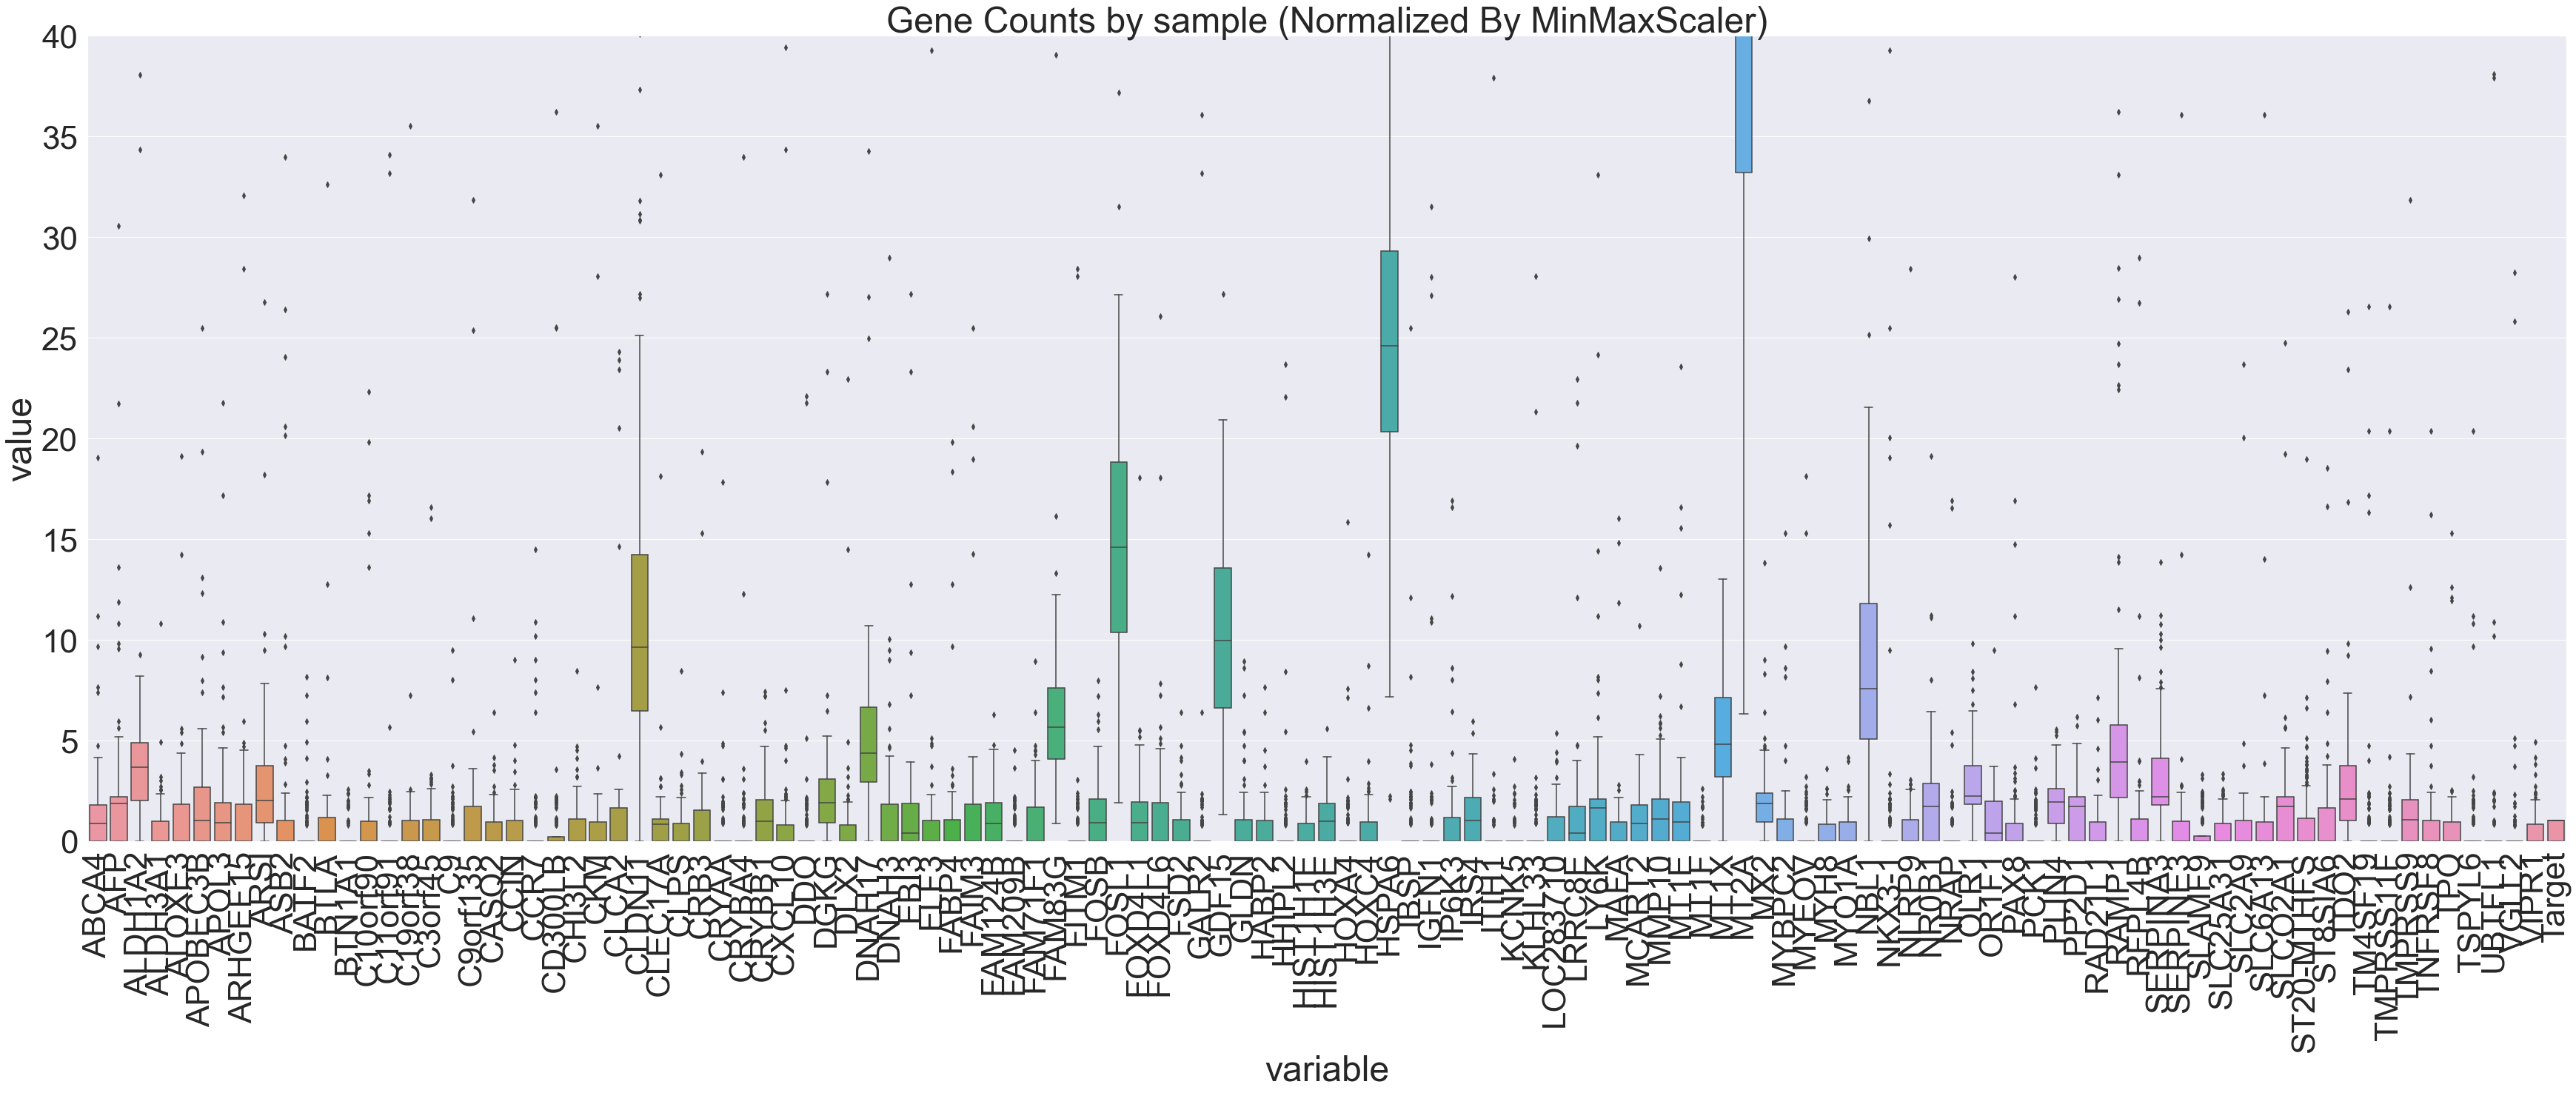

In [32]:
melted_X=pd.melt(Toxic_Nontoxic_Labeled)
plt.figure(figsize=(60,20))
plt.ylim(0,40)
plt.xticks(rotation=90)
sns.set(font_scale=4)
boxplot_nontoxic=sns.boxplot(
    data=melted_X,
    x='variable',
    y='value').set(title='Gene Counts by sample (Normalized By MinMaxScaler)')

In [33]:
# copy the data
df_max_scaled = Toxic_Nontoxic_Labeled.drop('Target',axis=1).copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

ABCA4       AFP   ALDH1A2   ALDH3A1    ALOXE3  APOBEC3B     APOL3  \
d2b10a  0.000000  0.070278  0.001154  0.000000  0.000000  0.000000  0.000000   
d2b10b  0.113740  0.000000  0.003490  0.000000  0.000000  0.000000  0.049761   
d2b1a   0.000000  0.029615  0.001946  0.000000  0.000000  0.000000  0.000000   
d2b1b   0.084766  0.000000  0.003468  0.000000  0.084444  0.063333  0.000000   
d2b2a   0.000000  0.000000  0.001128  0.000000  0.000000  0.041198  0.192990   
d2b2b   0.000000  0.000000  0.005961  0.000000  0.116120  0.000000  0.101993   
d2b3a   0.000000  0.000000  0.002460  0.000000  0.059898  0.044923  0.000000   
d2b3b   0.000000  0.078909  0.006481  0.000000  0.000000  0.000000  0.000000   
d2b4a   0.064948  0.000000  0.005314  0.000000  0.064701  0.097051  0.000000   
d2b4b   0.000000  0.072626  0.004772  0.000000  0.000000  0.000000  0.000000   
d2b5a   0.248975  0.000000  0.944777  0.000000  0.744084  0.000000  0.108927   
d2b5b   0.000000  0.065596  1.000000  0.000000  0.104954  0.000000  0.000000   
d2b6a   0.172814  0.000000  0.004714  0.000000  0.000000  0.000000  0.050404   
d2b6b   0.000000  0.065694  0.004317  0.185731  0.052555  0.118249  0.000000   
d2b7a   0.057649  0.000000  0.007076  0.000000  0.000000  0.043072  0.000000   
d2b7b   0.159657  0.066270  0.006532  0.000000  0.000000  0.039762  0.093133   
d2b8a   0.000000  0.119264  0.001306  0.000000  0.000000  0.095411  0.111738   
d2b8b   0.120691  0.112718  0.004938  0.212451  0.000000  0.135261  0.105605   
d2b9a   0.000000  0.077682  0.000000  0.000000  0.000000  0.000000  0.054585   
d2b9b   0.123683  0.000000  0.005060  0.000000  0.061606  0.046205  0.108222   
d2c10a  0.103983  0.097113  0.006381  0.183040  0.000000  0.000000  0.000000   
d2c10b  0.047761  0.029737  0.002931  0.084073  0.095159  0.000000  0.000000   
d2c11a  0.056877  0.106239  0.004654  0.000000  0.113322  0.042496  0.000000   
d2c11b  0.000000  0.032005  0.002103  0.000000  0.000000  0.038406  0.044978   
d2c12a  0.100318  0.062460  0.006156  0.000000  0.000000  0.000000  0.087778   
d2c12b  0.000000  0.099711  0.002184  0.000000  0.000000  0.358961  0.093419   
d2c13a  0.000000  0.000000  0.004432  0.000000  0.000000  0.000000  0.047392   
d2c13b  0.055229  0.034387  0.004519  0.097218  0.000000  0.165056  0.000000   
d2c14a  0.000000  0.000000  0.003156  0.000000  0.000000  0.000000  0.090003   
d2c14b  0.000000  0.061900  0.004067  0.000000  0.099039  0.000000  0.000000   
d2c15a  0.051211  0.000000  0.005238  0.090147  0.102033  0.038262  0.000000   
d2c15b  0.050161  0.093695  0.004104  0.176596  0.049970  0.037478  0.043891   
d2c16a  0.000000  0.068421  0.004496  0.000000  0.000000  0.000000  0.048078   
d2c16b  0.000000  0.169677  0.002787  0.000000  0.067871  0.152709  0.059614   
d2c17a  0.000000  0.000000  0.002049  0.088158  0.000000  0.112255  0.000000   
d2c17b  0.000000  0.055761  0.001832  0.000000  0.000000  0.000000  0.078364   
d2c18a  0.000000  0.027353  0.000899  0.231999  0.087530  0.098471  0.038441   
d2c18b  0.094350  0.000000  0.004825  0.000000  0.093991  0.140987  0.041278   
d2c19a  0.050952  0.000000  0.001042  0.000000  0.000000  0.000000  0.000000   
d2c19b  0.045295  0.056403  0.005559  0.000000  0.000000  0.067683  0.079266   
d2c1a   0.000000  0.064861  0.002131  0.000000  0.051889  0.038917  0.000000   
d2c1b   0.000000  0.000000  0.001155  0.000000  0.000000  0.042172  0.098778   
d2c20a  0.000000  0.000000  0.002547  0.000000  0.000000  0.000000  0.000000   
d2c20b  0.057701  0.071852  0.004721  0.000000  0.000000  0.086222  0.000000   
d2c21a  0.000000  0.071861  0.002361  0.000000  0.000000  0.000000  0.000000   
d2c21b  0.000000  0.032023  0.002104  0.000000  0.000000  0.115283  0.045004   
d2c22a  0.000000  0.071016  0.008166  0.000000  0.000000  0.000000  0.000000   
d2c22b  0.000000  0.066557  0.005467  0.094085  0.000000  0.039934  0.046768   
d2c23a  0.000000  0.000000  0.001110  0.000000  0.000000  0.000000  0.047489   
d2c23b  0.0

(-2.0, 2.0)

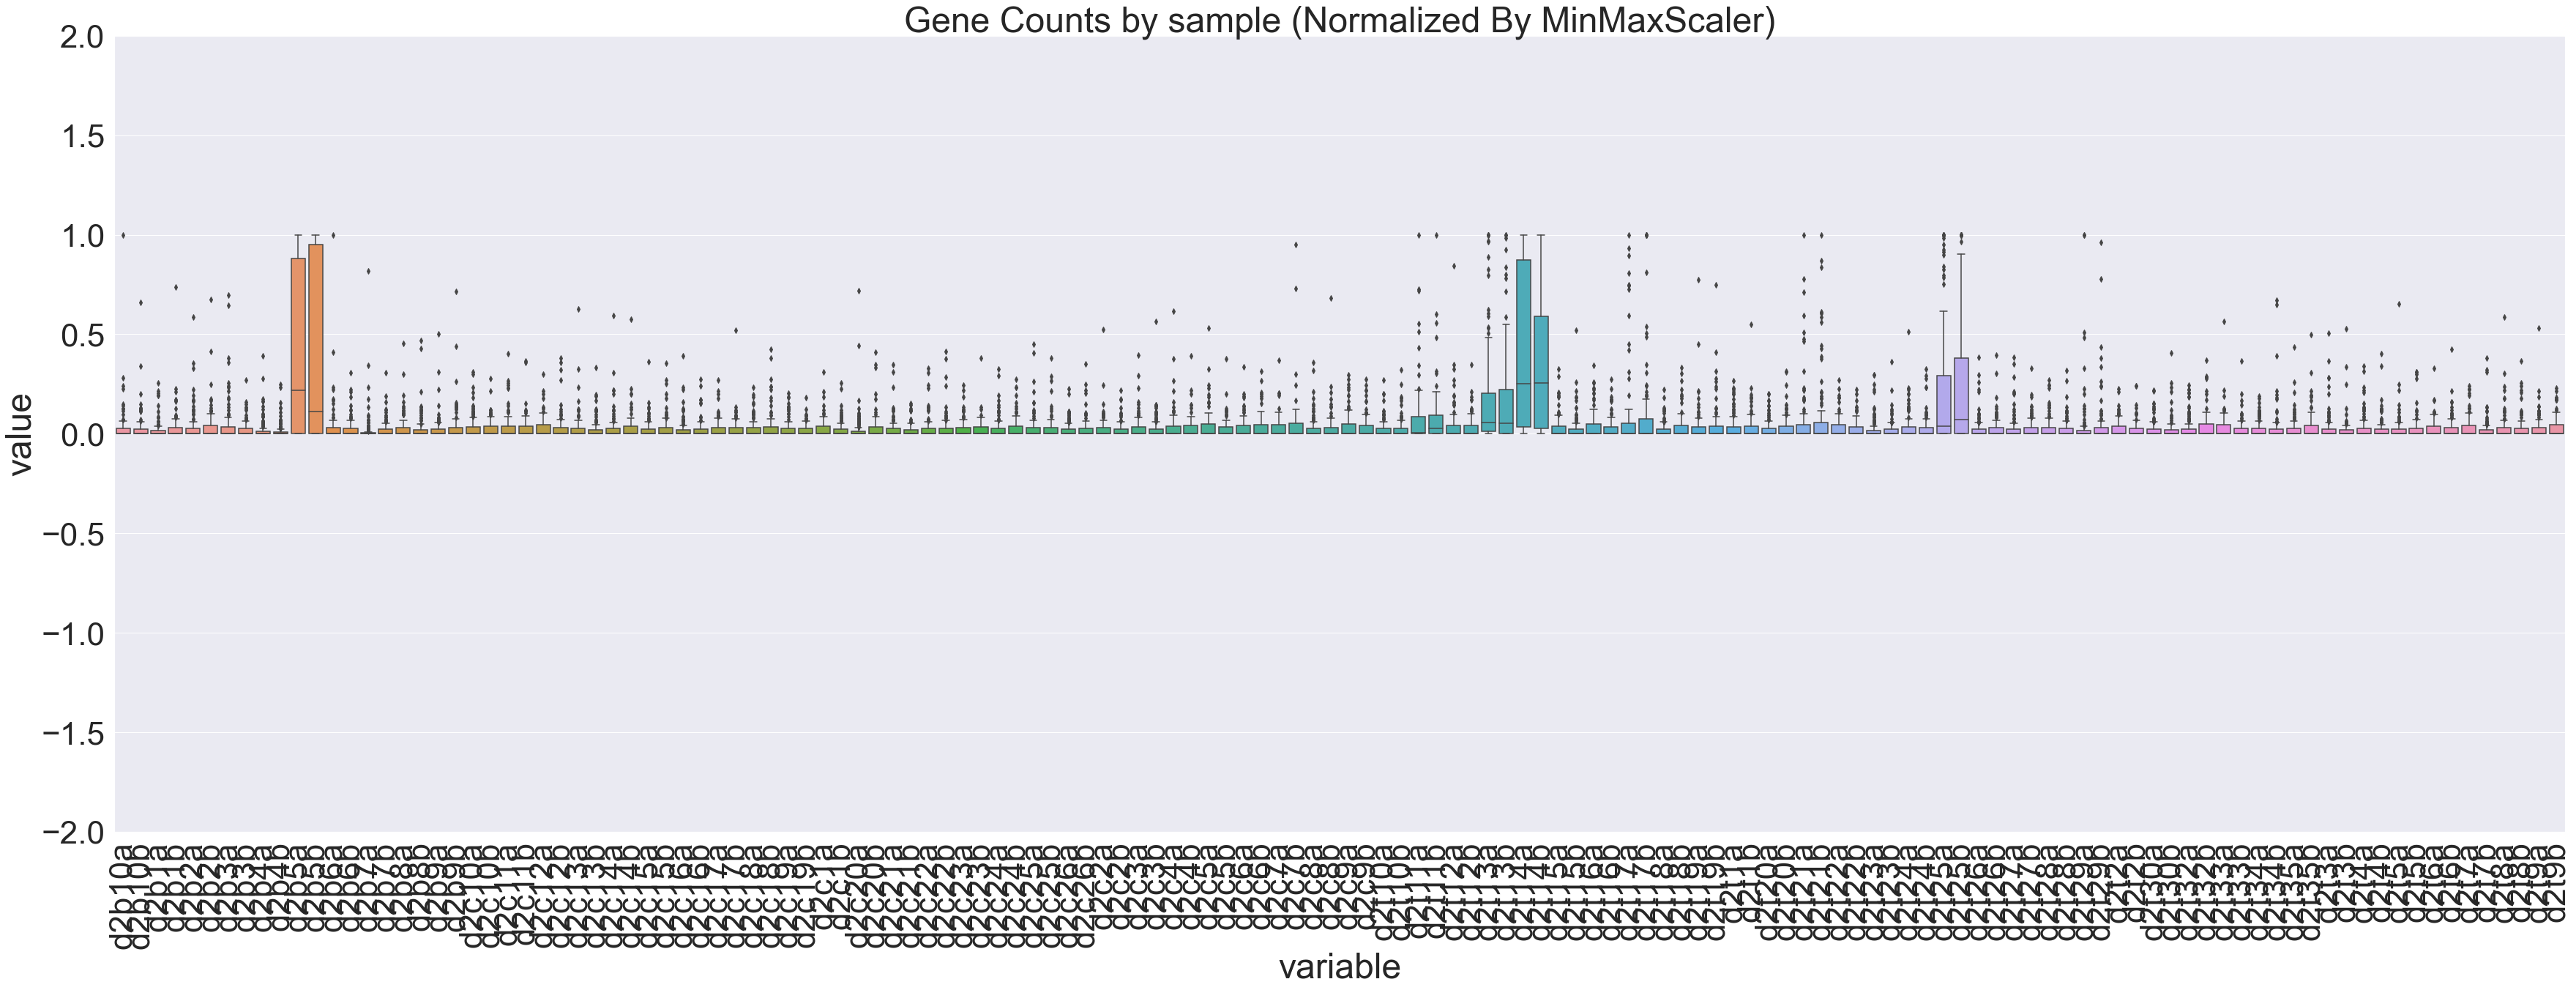

In [34]:
t_df_max_scaled=df_max_scaled.transpose()
melted_X=pd.melt(t_df_max_scaled)
plt.figure(figsize=(60,20))
plt.ylim(0,40)
plt.xticks(rotation=90)
sns.set(font_scale=4)
boxplot_norm_sample=sns.boxplot(
    data=melted_X,
    x='variable',
    y='value').set(title='Gene Counts by sample (Normalized By MinMaxScaler)')
plt.ylim(-2, 2)


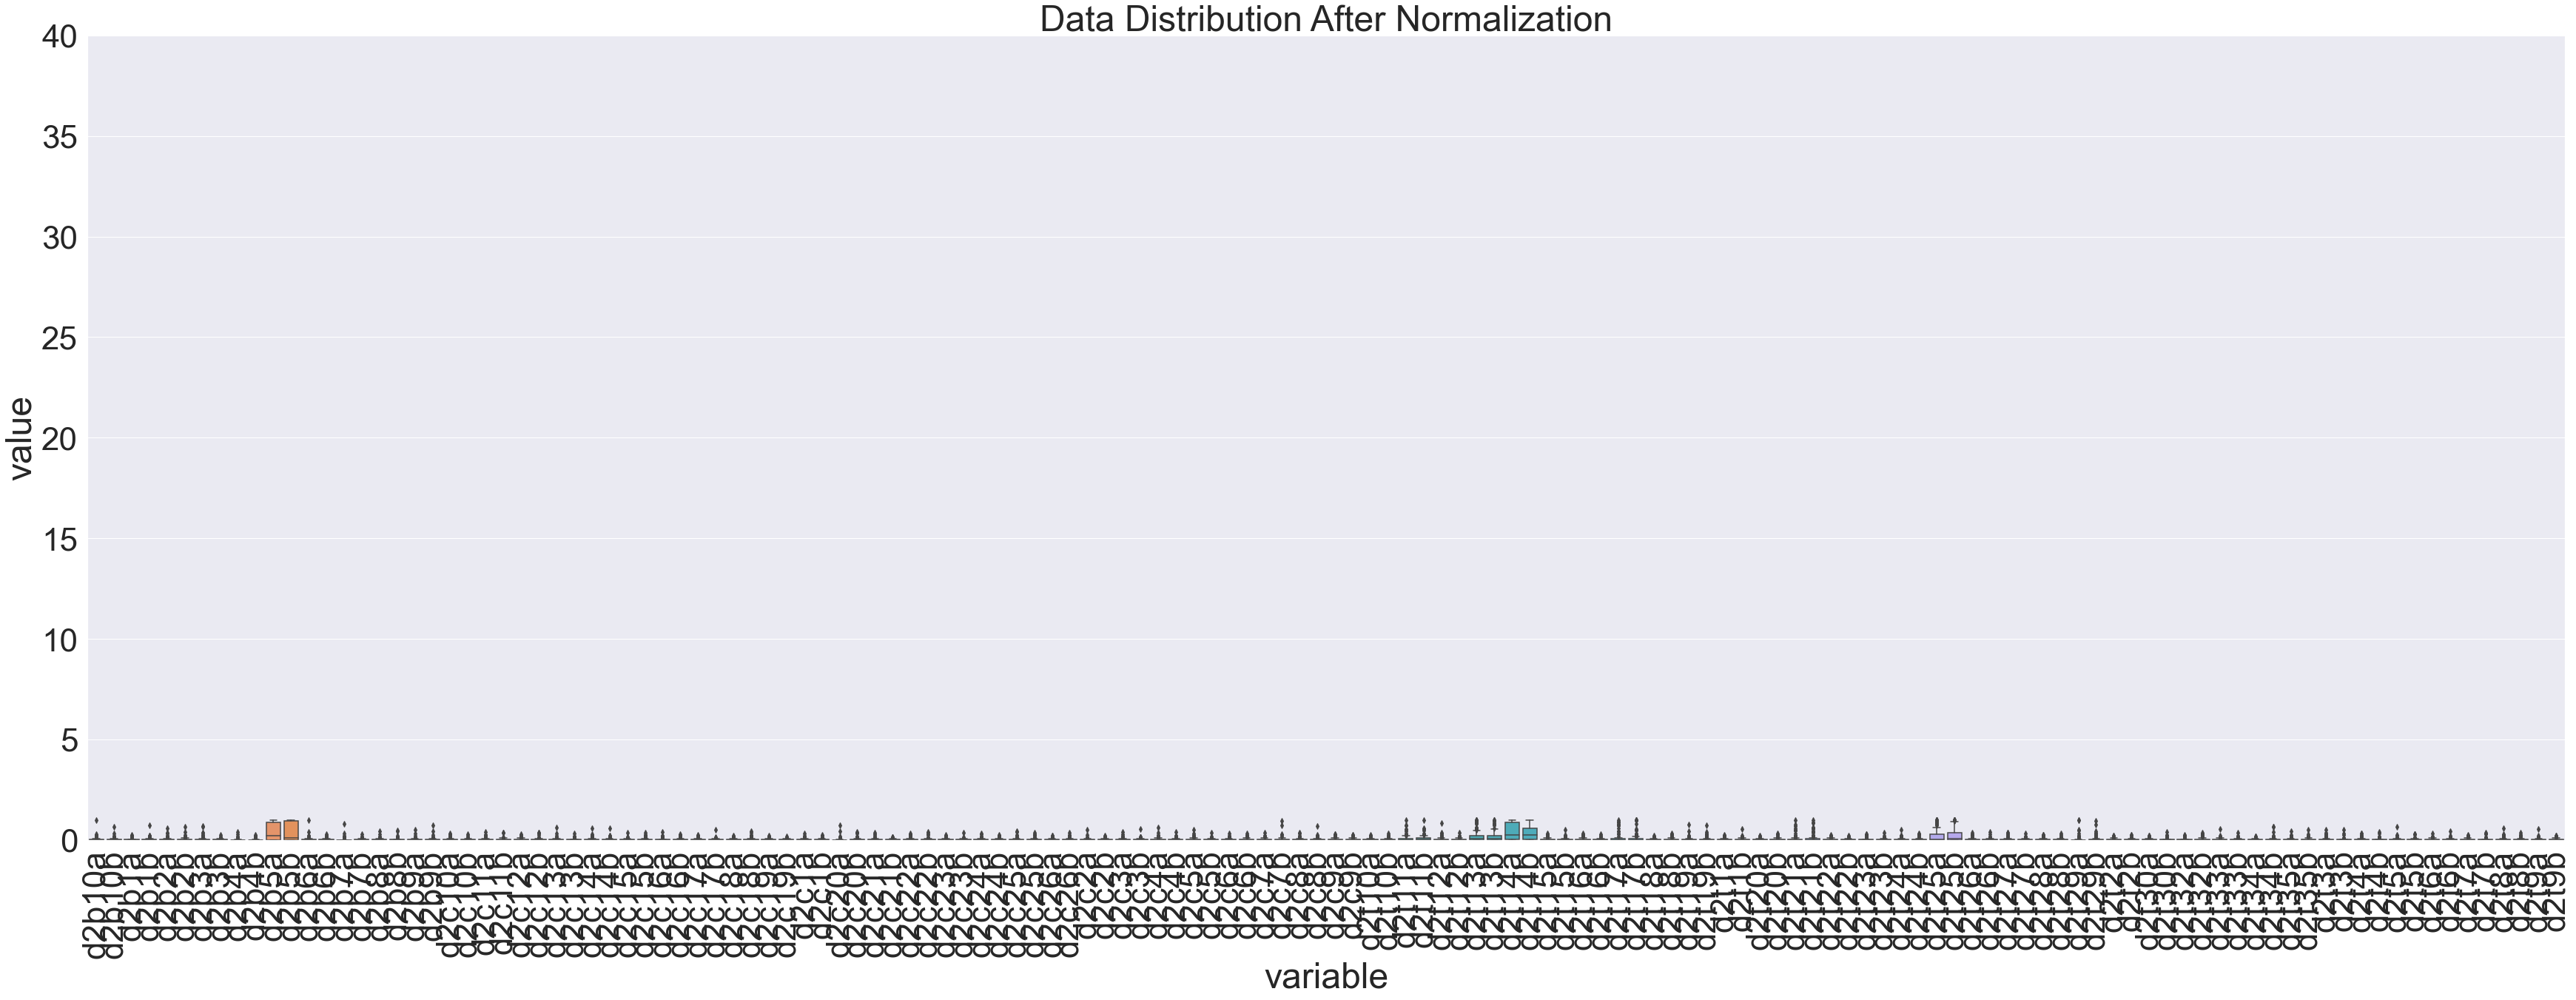

In [35]:
melted_normalized=pd.melt(df_max_scaled)
plt.figure(figsize=(60,20))
plt.ylim(0,40)
plt.xticks(rotation=90)
sns.set(font_scale=4)
boxplot_genes_norm=sns.boxplot(
    data=melted_X,
    x='variable',
    y='value').set(title='Data Distribution After Normalization')

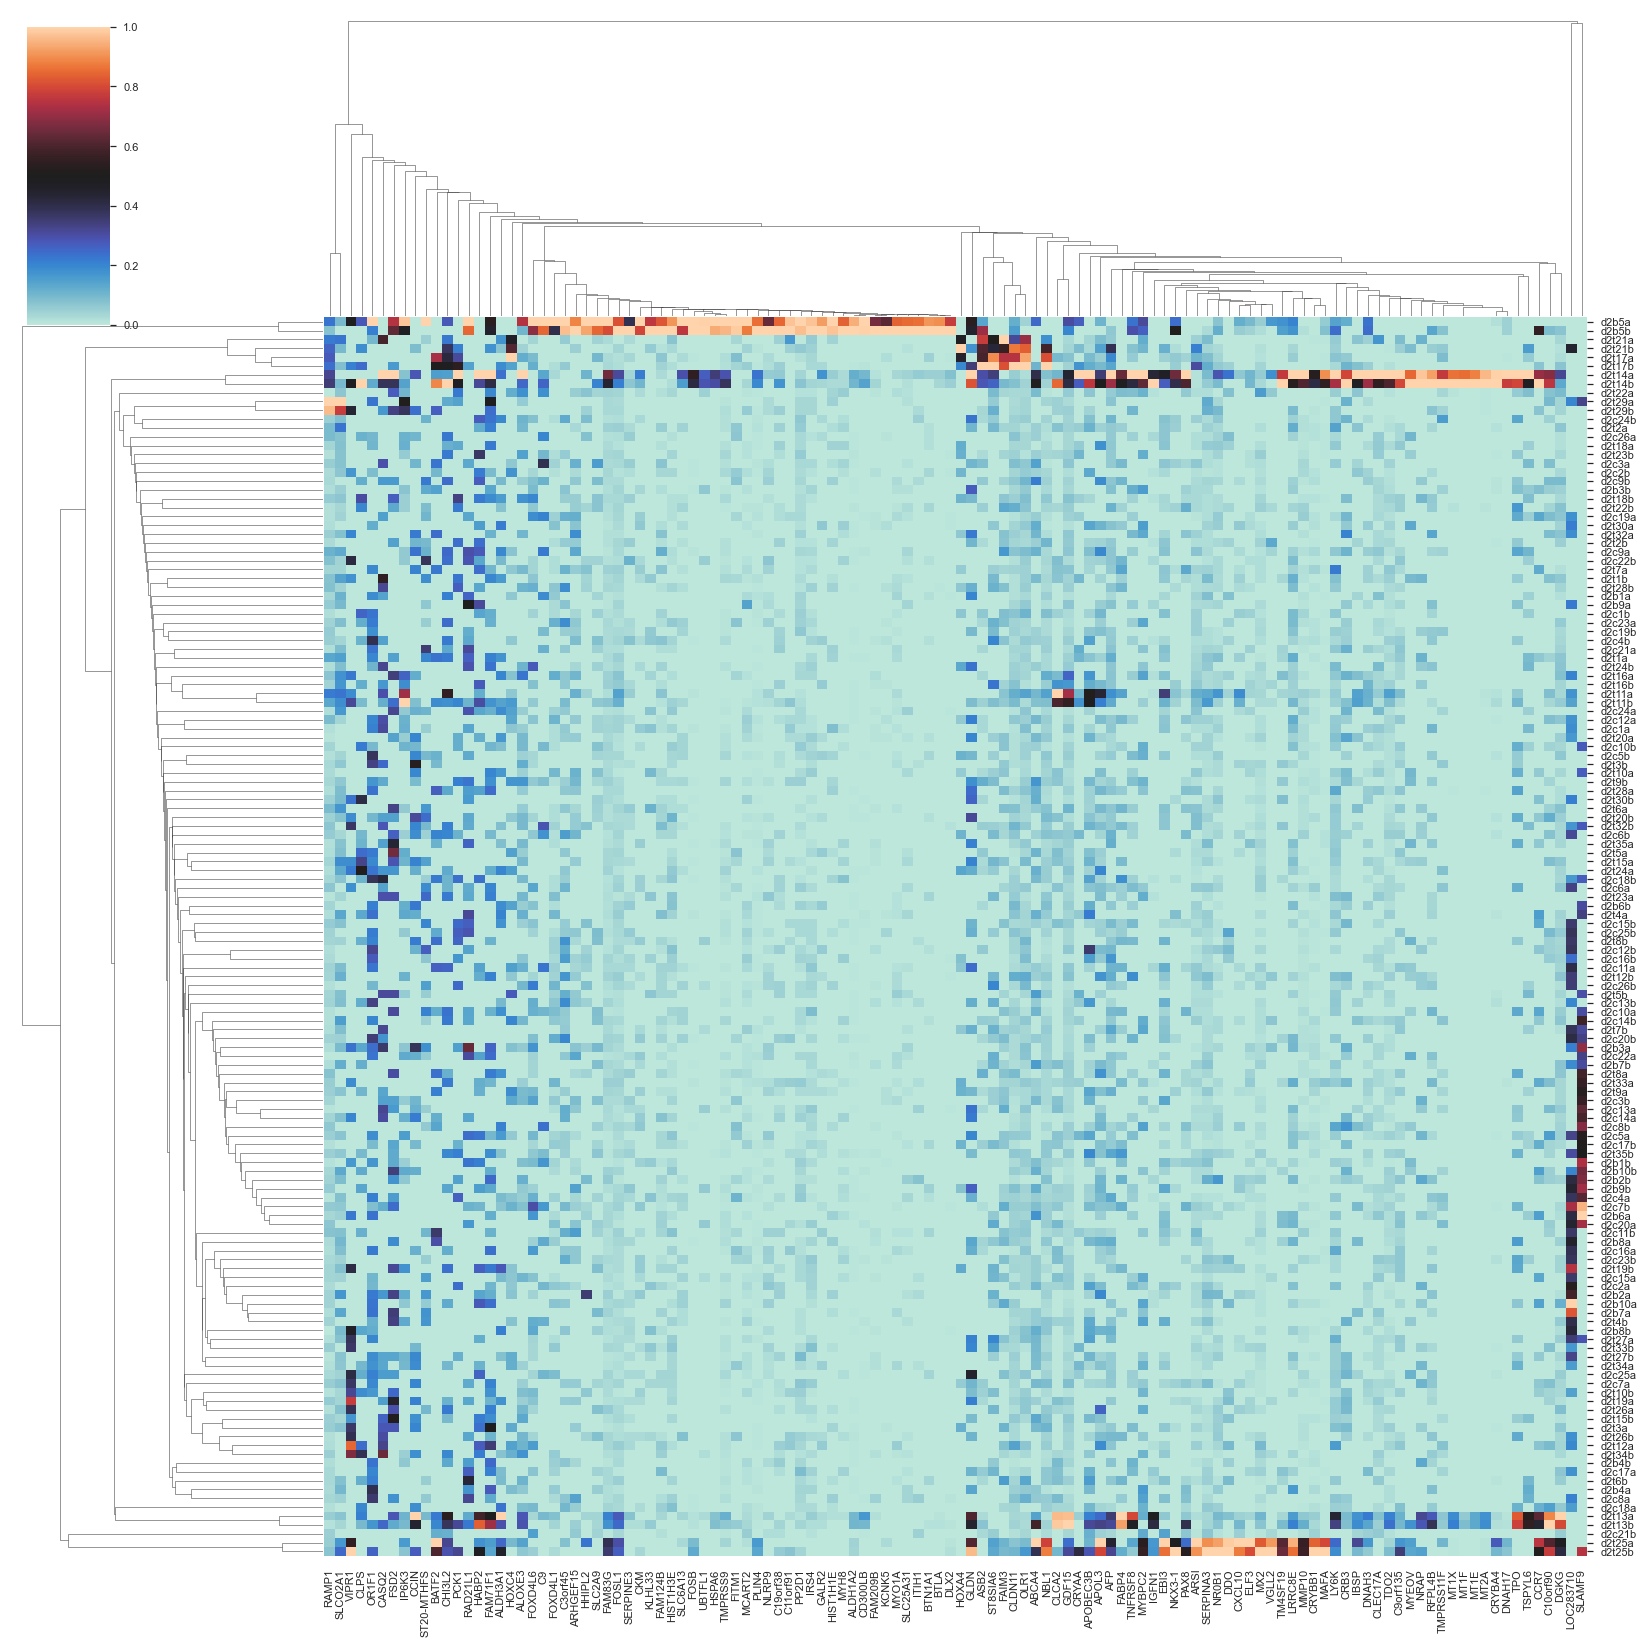

In [36]:
# plot
sns.set(font_scale=1)
h=sns.clustermap(df_max_scaled, metric="correlation", method="single", cmap="icefire",yticklabels=True,xticklabels=True,figsize=(23, 23))
plt.show()

# Implementation of Classification Algorithms

## Part 1: Test Different Classification Algorithms using Pycaret Library

Explore the performance of different Machine Learning Algorithms through Pycaret and sklearn Libraries

In [37]:
#Test different machine learning models with low code pycaret library
grid = setup(data=Toxic_Nontoxic_Labeled, target='Target')
best=compare_models()

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.0.2. Support for newer scikit-learn versions will be added in a future release.

### Random Forest Classifier (Pycaret)

In [38]:
rf = create_model('rf')

NameError: name '_all_models_internal' is not defined

In [32]:
tuned_rf = tune_model(rf)

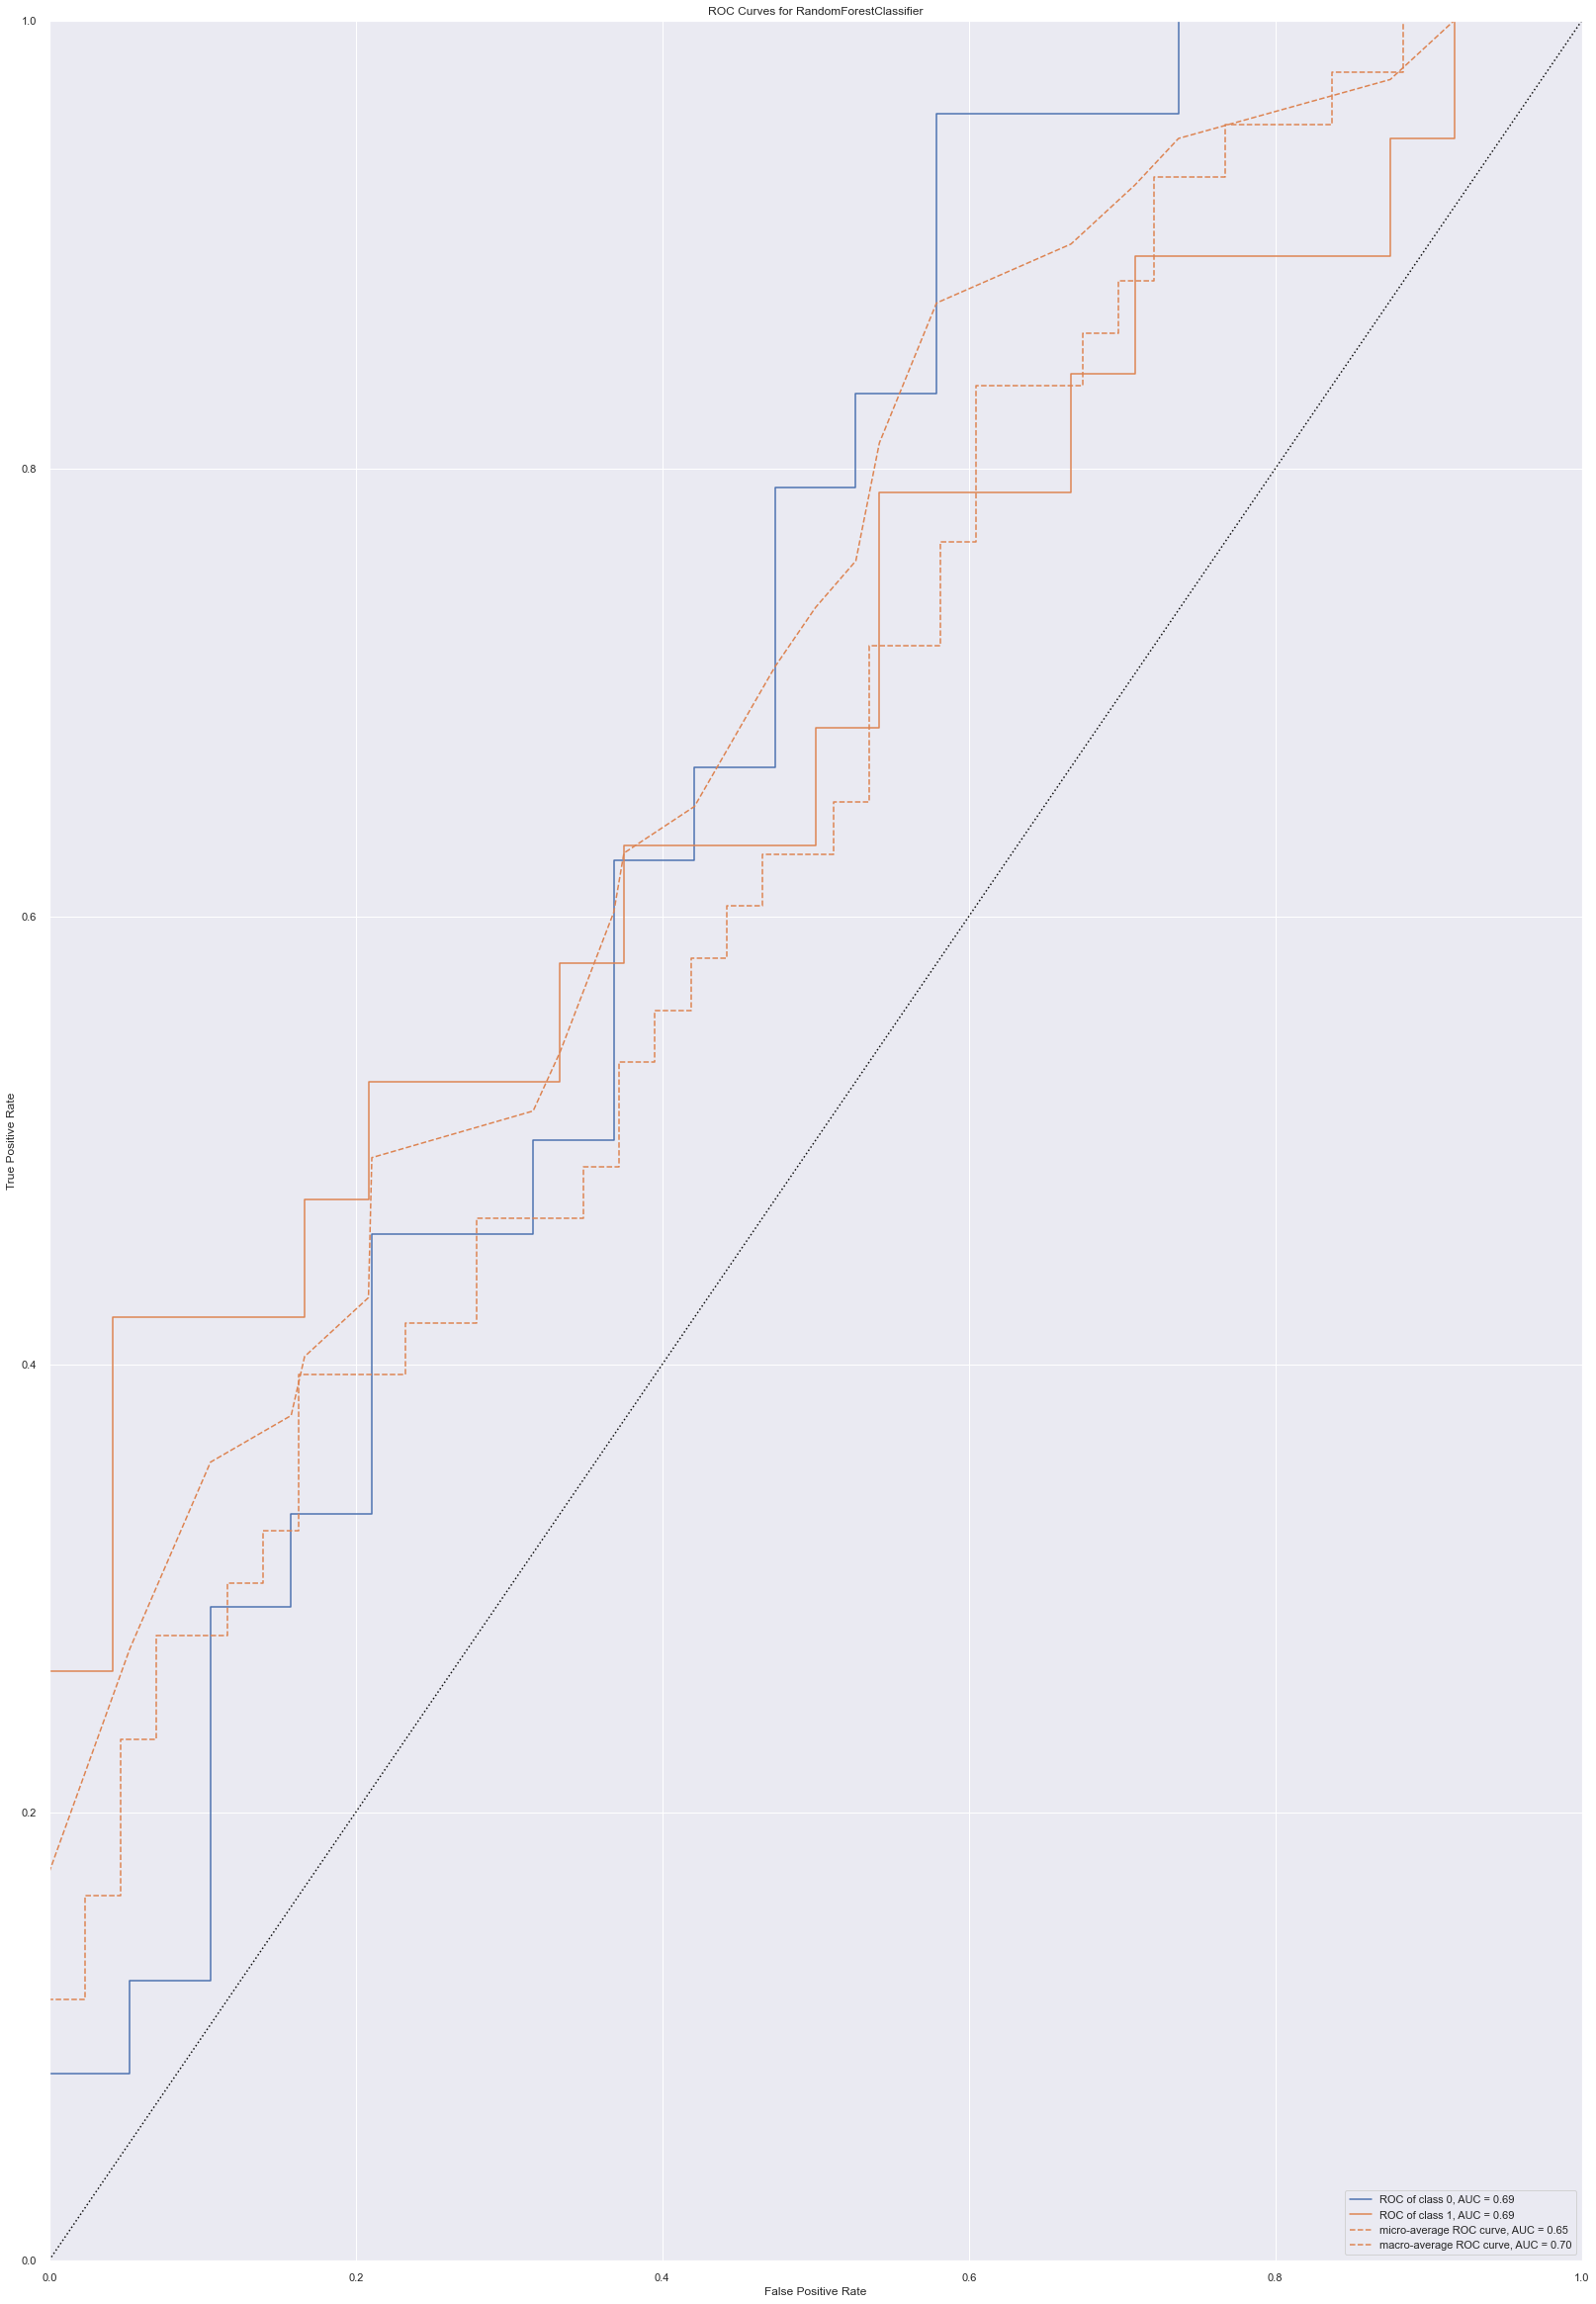

In [33]:
plot_model(tuned_rf,plot_kwargs = {'size':(2000, 3000)})

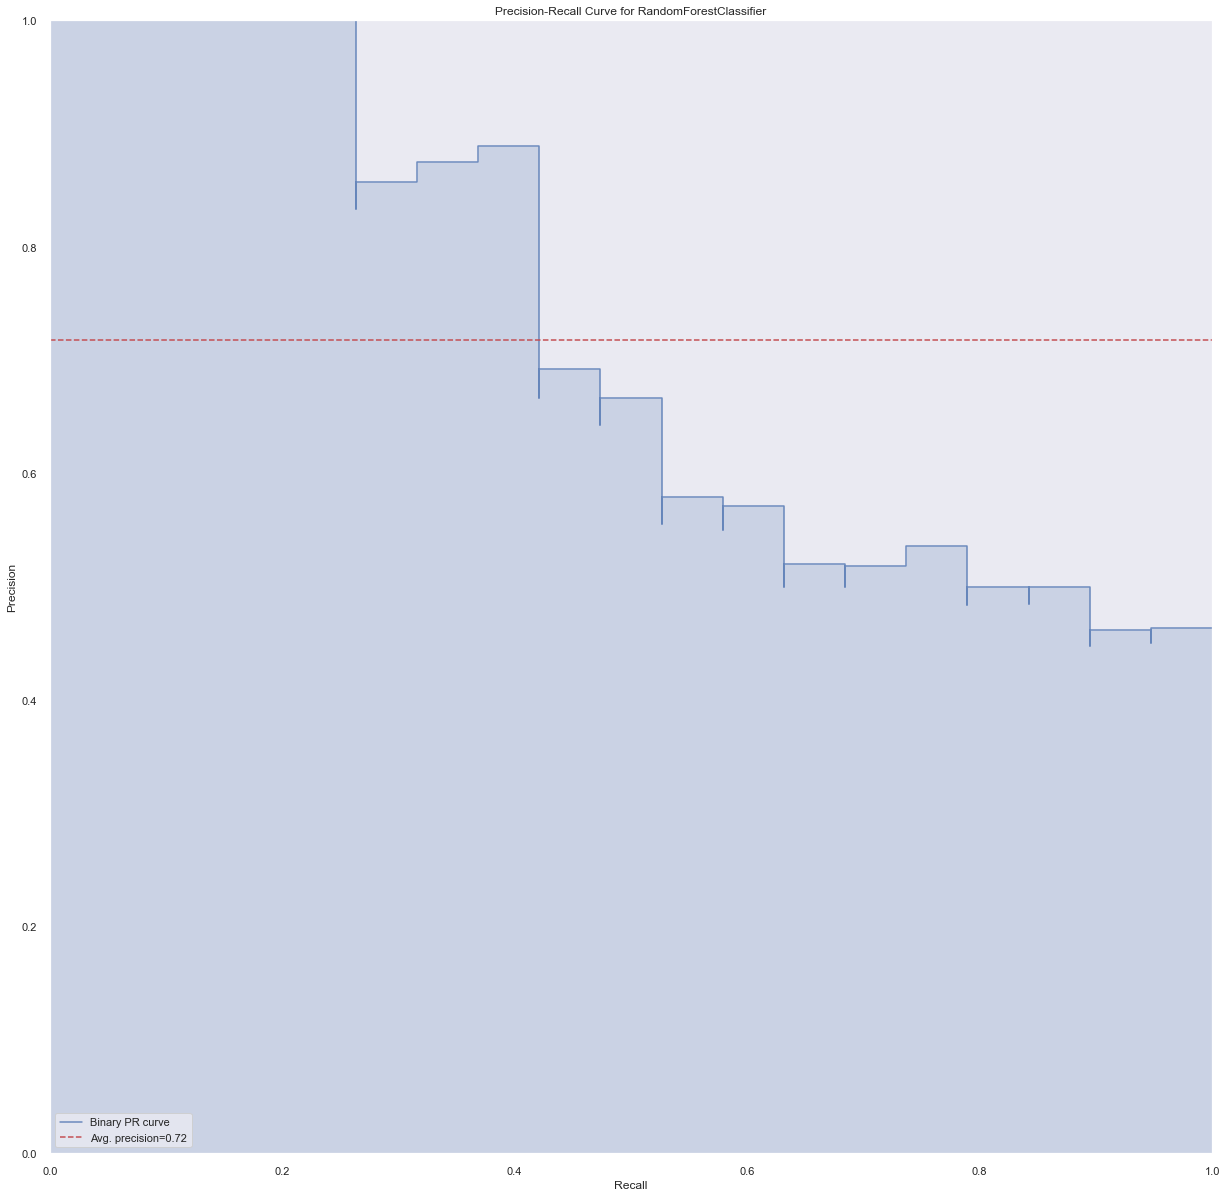

In [34]:
plot_model(tuned_rf, plot = 'pr',plot_kwargs = {'size':(1500, 1500)})

### Support Vector Machines Classifier (Pycaret)

In [35]:
svm = create_model('svm')

In [36]:
tuned_svm = tune_model(svm)

### K-Nearest Neigbors Classifier (Pycaret)

In [38]:
knn = create_model('knn')

In [39]:
tuned_knn = tune_model(knn)

In [40]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=18, p=2,
                     weights='distance')


### Clustering with Pycaret

Given that clustering had been conducted as part of the Differential Gene Expression analysis, now I want to see how the data clusters with only differentially expressed genes.

In [43]:
from pycaret.clustering import *
s = setup(X2, normalize = True)

In [44]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.7787            97.7928          0.4025            0           0   

   Completeness  
0             0

In [45]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8248, tol=0.0001, verbose=0)


In [46]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [47]:
models() #Get List of models available for clustering

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

## Part 2: Implementation of Machine Learning Models with sklearn library

I want to compare the performance of Support Vector Machines Classifier, Random Forest Classifier, Decision Tree Classifier, and K-nearest neighbors classifiers.

In [39]:
#Use MinMaxScaler() in order to scale the data features (important given that outliers were seen)
X = Toxic_Nontoxic_Labeled.drop('Target',axis=1)
X2=Toxic_Nontoxic_Labeled
y = Toxic_Nontoxic_Labeled['Target']
X = MinMaxScaler().fit_transform(X) 

In [40]:
y.value_counts()/len(y) #Here we confirm that the distribution of classes is prety even between the two groups with a slight bias toward 'Toxic' labeled samples

1    0.514286
0    0.485714
Name: Target, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

### Model Comparison

In [42]:
models_list = ["SVM","Decision_Tree","Random_Forest","KNN"]
models_call = [SVC(),DecisionTreeClassifier(),RandomForestClassifier(), KNeighborsClassifier()]

In [43]:
#Loop through models to obtain accuracy scores
accuracy_scores = []
for model_name, model in zip(models_list, models_call):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy_scores.append(score)

In [44]:
accuracy_scores

[0.6666666666666666,
 0.5714285714285714,
 0.6190476190476191,
 0.7380952380952381]

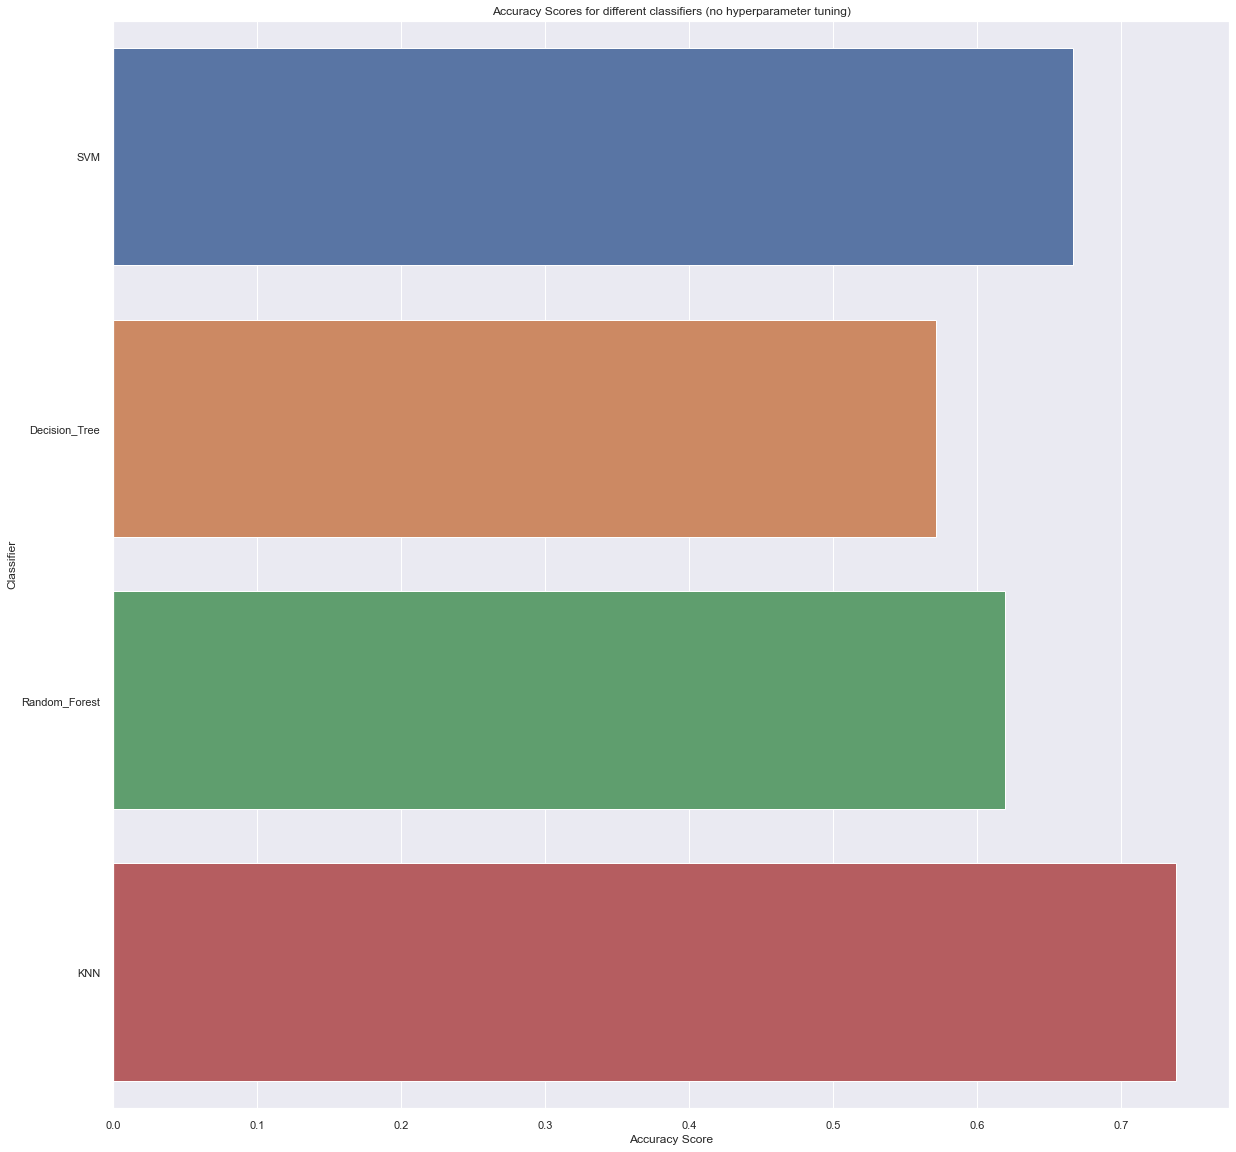

In [45]:
scores_df = pd.DataFrame()
scores_df['name'] = models_list
scores_df['score'] = accuracy_scores
scores_df = scores_df.rename(columns={"name":"Classifier"})
scores_df = scores_df.rename(columns={"score":"Accuracy Score (No Tuning)"})
fig = plt.figure(figsize=(20,20))
scores_barplot = sns.barplot(y="Classifier", x="Accuracy Score (No Tuning)", data=scores_df).set(xlabel="Accuracy Score", ylabel = "Classifier",title='Accuracy Scores for different classifiers (no hyperparameter tuning)')

Based on the barplot above, the best performing model in predicting whether a neural construct had been exposed 

### Tune models

In [46]:
#Define dictionaries with parameters to try for each model
parameter_tuning_svm={'C': [ 0.1,1], 'gamma': [1,0.1,0.01]}
parameter_tuning_dt={'criterion':['gini', 'entropy'],'max_depth':range(1,6)}
parameter_tuning_rf={'criterion':['gini', 'entropy'],'max_depth':range(1,6),'n_estimators': np.arange(10,180,10)}
parameter_tuning_knn={'n_neighbors': [1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [47]:
svm = SVC()
grid_svm=GridSearchCV(svm,param_grid=parameter_tuning_svm)
grid_svm.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01]})

In [48]:
dec_tree=DecisionTreeClassifier()
grid_dt=GridSearchCV(dec_tree,param_grid=parameter_tuning_dt)
grid_dt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6)})

In [49]:
rf = RandomForestClassifier()
grid_rf=GridSearchCV(rf,param_grid=parameter_tuning_rf)
grid_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170])})

In [50]:
#Perform a grid search with each model to find the best parameter combination
knn= KNeighborsClassifier()
grid_knn=GridSearchCV(knn,param_grid=parameter_tuning_knn)
grid_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

### Obtain the best parameters from each model 

In [51]:
grid_svm.best_params_

{'C': 1, 'gamma': 1}

In [52]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [53]:
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 120}

In [54]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

### Obtain performance metrics

Train models with optimized parameters

In [56]:
optimized_svm = SVC(C= 1, gamma= 1)
optimized_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
optimized_rf = RandomForestClassifier(criterion='entropy', max_depth= 1, n_estimators=90)
optimized_knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors=4, weights= 'distance')

In [57]:
optimized_svm.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [58]:
optimized_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [59]:
optimized_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=1, n_estimators=90)

In [60]:
optimized_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [61]:
predictions_svm = optimized_svm.predict(X_test)
predictions_rf = optimized_dt.predict(X_test)
predictions_dt= optimized_rf.predict(X_test)
predictions_knn = optimized_knn.predict(X_test)

In [62]:
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.67      0.78      0.72        23

    accuracy                           0.67        42
   macro avg       0.67      0.65      0.65        42
weighted avg       0.67      0.67      0.66        42



In [63]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        19
           1       0.63      0.52      0.57        23

    accuracy                           0.57        42
   macro avg       0.58      0.58      0.57        42
weighted avg       0.58      0.57      0.57        42



In [64]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        19
           1       0.63      0.52      0.57        23

    accuracy                           0.57        42
   macro avg       0.58      0.58      0.57        42
weighted avg       0.58      0.57      0.57        42



In [65]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.71      0.87      0.78        23

    accuracy                           0.74        42
   macro avg       0.75      0.72      0.73        42
weighted avg       0.75      0.74      0.73        42



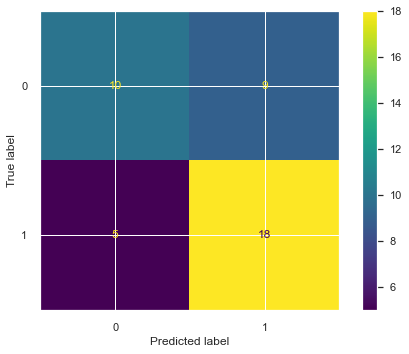

In [66]:
plot_confusion_matrix(optimized_svm, X_test,y_test)

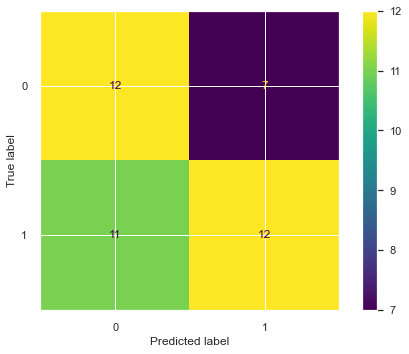

In [67]:
plot_confusion_matrix(optimized_dt, X_test,y_test)

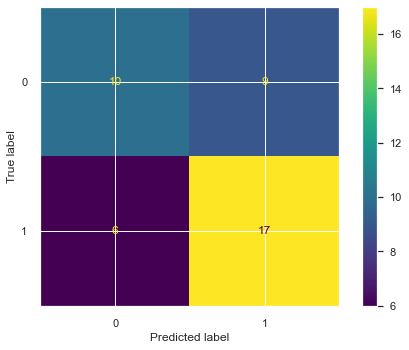

In [68]:
plot_confusion_matrix(optimized_rf, X_test,y_test)

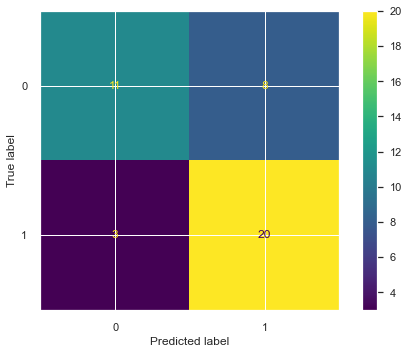

In [69]:
plot_confusion_matrix(optimized_knn, X_test,y_test)

### Further Performance Evaluation

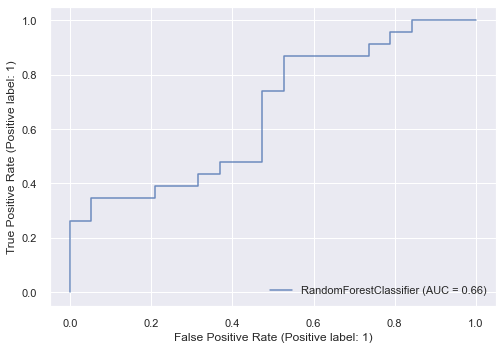

In [73]:
rfc_disp = RocCurveDisplay.from_estimator(optimized_rf, X_test, y_test, alpha=0.8)

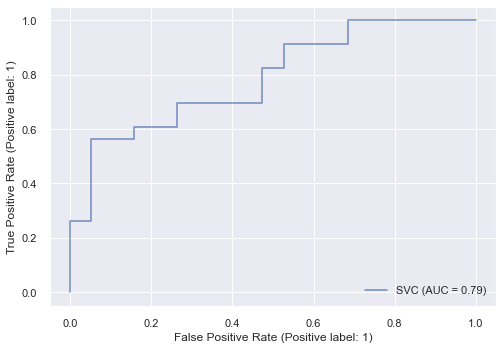

In [74]:
svm_disp = RocCurveDisplay.from_estimator(optimized_svm, X_test, y_test, alpha=0.8)

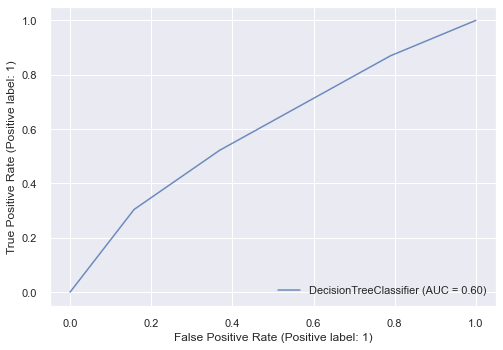

In [75]:
dt_disp = RocCurveDisplay.from_estimator(optimized_dt, X_test, y_test, alpha=0.8)

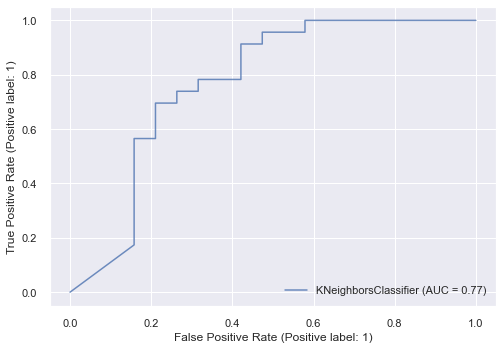

In [76]:
knn_disp = RocCurveDisplay.from_estimator(optimized_knn, X_test, y_test, alpha=0.8)

## Cross Validation Implementation

In [92]:
#The lists below will be used to store average cross validation scores for each classifier and will beused to build a report
#k-fold cross validation empty list
KFOLD=[]
#Leave One out cross validation empty list
LOO=[]

### K Fold Cross Validation 

In [93]:
#Cross validation SVM
scores_kfold_svm=cross_val_score(optimized_svm, X, y, cv=cv_kfold)
KFOLD.append(scores_kfold_svm.mean())
scores_kfold_svm.mean()


0.5285714285714286

In [94]:
#Cross validation Random Forest
scores_kfold_rf=cross_val_score(optimized_rf, X, y, cv=cv_kfold)
KFOLD.append(scores_kfold_svm.mean())
scores_kfold_rf.mean()

0.14285714285714285

In [95]:
#Cross validation Decision Tree
scores_kfold_dt=cross_val_score(optimized_dt, X, y, cv=cv_kfold)
KFOLD.append(scores_kfold_dt.mean())
scores_kfold_dt.mean()

0.39999999999999997

In [96]:
#Cross validation K Nearest Neighbors
scores_kfold_knn=cross_val_score(optimized_knn, X, y, cv=cv_kfold)
KFOLD.append(scores_kfold_knn.mean())
scores_kfold_knn.mean()

0.6285714285714286

### LeaveOne Out Cross Validation

In [97]:
cv = LeaveOneOut()

In [102]:
# Leave one out (LOO) cross validation SVM 
scores_loo_svm=cross_val_score(optimized_svm, X, y, cv=cv)
LOO.append(scores_loo_svm.mean())
scores_loo_svm.mean()

0.7357142857142858

In [103]:
# Leave one out (LOO) cross validation random forest 
scores_loo_rf=cross_val_score(optimized_rf, X, y, cv=cv)
LOO.append(scores_loo_rf.mean())
scores_loo_rf.mean()

0.6642857142857143

In [104]:
# Leave one out (LOO) cross validation decision tree 
scores_loo_dt=cross_val_score(optimized_dt, X, y, cv=cv)
LOO.append(scores_loo_dt.mean())
scores_loo_dt.mean()

0.6857142857142857

In [105]:
# Leave one out (LOO) cross validation k nearest neighbors
scores_loo_knn=cross_val_score(optimized_knn, X, y, cv=cv)
LOO.append(scores_loo_knn.mean())
scores_loo_knn.mean()

0.7357142857142858